# Recommender Systems - Mini Challenge HS25

In this minichallenge we will explore a MovieLens dataset and implement several recommender systems and evaluation methods. Subsequently we will optimize these methods and compare the results. 

**Submission deadline:** Sunday of SW11 um 18:00 

## Guidelines for Implementation and Submission
- Code must be written in Python. The versions of all used packages must be given for reproducability.
- You may respond in English or German.
- We develop numerous algorithms ourselves. Unless explicitly stated otherwise, only the following libraries may be used in Python: numpy, matplotlib, seaborn, pandas. 
- Follow good coding practices and write modular, reusable code.
- The submitted solution must contain all codes and the results. No code may be outsourced.
- All pathes must be relative and just downloading your repo must be executable without modifications.
- Only fully running code is graded. The notebook must run sequential from start to end.
- During development, if computation time is too long for productive prototyping and debugging work, it is recommended to reduce the dataset to a fraction of its original. However, final results must be calculated on the full dataset. 
- All plots must be fully labeled (title, axes, labels, colorbar, etc.) so that the plot can be easily understood.
- Each plot must be accompanied by a brief discussion, which explains the plot and captures the key insights that become visible.
- Only fully labeled plots with an accompanying discussion will be assessed.
- The last commit in your fork of the repo before the submission deadline counts as the submission.
- Points will be deducted if you write inconsise (Denial of service will be punished) or if I read text not written for me but for the user of ChatGPT oir similar. 
- If you would like to submit and have the mini-challenge assessed, please send a short email to the subject expert (moritz.kirschmann@fhnw.ch) within 2 days after submission.
- Please do not delete, duplicate, or move the existing cells. This leads to problems during the correction. However, you may add as many additional cells as you like.

## Exercises

### Exercise 1 - A deep exploration of the dataset (17 points)
We will work with a subset of the MovieLens dataset. This subset is located under ``data/ml-latest-small``. Read the ``README.txt``carefully. 
Open the files. 

a) Describe the available data.

b) Find and fix bad data (e.g. duplicates, missing values, etc.).

Generate lists of

c) - Top 20 movies by average rating

d) - Top 20 movies by number of views

e) What is the range of the ratings? 

f) Which genre has be rated how many times?

g) How sparse is the User Rating Matrix?

Plot the following:

h) How many users have rated how many movies

i) Which rating is given how often over time with a time resolution of month 

j) Which rating is given how often per genre

k) The rating distributions of 10 random movies

l) The rating distributions of 3 movies that you have watched

m) How many users give which average rating

n) How often a movie was rated as a function of average rating

o) A heatmap of the User Item Matrix

p) A heatmap of the User Item Matrix for the 100 most rated movies for the 50 users with most ratings


In [57]:
# deep exploration of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import numpy as np
from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the datasets
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')
links = pd.read_csv('data/links.csv')
tags = pd.read_csv('data/tags.csv')

print("\nDataset shapes:")
print(f"Ratings: {ratings.shape}")
print(f"Movies: {movies.shape}")
print(f"Links: {links.shape}")
print(f"Tags: {tags.shape}")



Dataset shapes:
Ratings: (100836, 4)
Movies: (9742, 3)
Links: (9742, 3)
Tags: (3683, 4)


In [58]:
# a) Describe the available data
print("\n1. RATINGS DATASET:")
print(ratings.head())
print(f"\nColumns: {list(ratings.columns)}")
print(f"Data types:\n{ratings.dtypes}")
print(f"Basic statistics:\n{ratings.describe()}")

print("\n2. MOVIES DATASET:")
print(movies.head())
print(f"\nColumns: {list(movies.columns)}")
print(f"Data types:\n{movies.dtypes}")

print("\n3. LINKS DATASET:")
print(links.head())
print(f"\nColumns: {list(links.columns)}")
print(f"Data types:\n{links.dtypes}")

print("\n4. TAGS DATASET:")
print(tags.head())
print(f"\nColumns: {list(tags.columns)}")
print(f"Data types:\n{tags.dtypes}")

print("\n=== DATA OVERVIEW ===")
print(f"• Total ratings: {len(ratings):,}")
print(f"• Unique users: {ratings['userId'].nunique():,}")
print(f"• Unique movies: {ratings['movieId'].nunique():,}")
print(f"• Total movies in dataset: {len(movies):,}")
print(f"• Total tags: {len(tags):,}")
print(f"• Rating period: {datetime.fromtimestamp(ratings['timestamp'].min()).strftime('%Y-%m-%d')} to {datetime.fromtimestamp(ratings['timestamp'].max()).strftime('%Y-%m-%d')}")



1. RATINGS DATASET:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Columns: ['userId', 'movieId', 'rating', 'timestamp']
Data types:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
Basic statistics:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.0000

In [59]:
# b) Find and fix bad data

# 1. MISSING VALUES ANALYSIS
print("\n1. MISSING VALUES ANALYSIS:")
print("Ratings dataset:")
print(ratings.isnull().sum())
print("\nMovies dataset:")
print(movies.isnull().sum())
print("\nLinks dataset:")
print(links.isnull().sum())
print("\nTags dataset:")
print(tags.isnull().sum())

# 2. DUPLICATES ANALYSIS
print("\n2. DUPLICATES ANALYSIS:")
print(f"Duplicate ratings: {ratings.duplicated().sum()}")
print(f"Duplicate movies: {movies.duplicated().sum()}")
print(f"Duplicate links: {links.duplicated().sum()}")
print(f"Duplicate tags: {tags.duplicated().sum()}")
print(f"Duplicate user-movie ratings: {ratings.duplicated(subset=['userId', 'movieId']).sum()}")

# 3. DATA CONSISTENCY ANALYSIS
print("\n3. DATA CONSISTENCY ANALYSIS:")
movies_in_ratings_not_movies = set(ratings['movieId']) - set(movies['movieId'])
movies_in_movies_not_ratings = set(movies['movieId']) - set(ratings['movieId'])
print(f"Movies in ratings but not in movies: {len(movies_in_ratings_not_movies)}")
print(f"Movies in movies but not in ratings: {len(movies_in_movies_not_ratings)}")

# 4. INVALID DATA ANALYSIS
print("\n4. INVALID DATA ANALYSIS:")
invalid_ratings = ratings[(ratings['rating'] < 0.5) | (ratings['rating'] > 5.0)]
print(f"Invalid ratings (outside 0.5-5.0 range): {len(invalid_ratings)}")

movies_no_genres = movies[movies['genres'] == '(no genres listed)']
print(f"Movies with no genres: {movies_no_genres.shape[0]}")

# Check for negative user IDs or movie IDs
negative_user_ids = ratings[ratings['userId'] <= 0]
negative_movie_ids = ratings[ratings['movieId'] <= 0]
print(f"Negative user IDs: {len(negative_user_ids)}")
print(f"Negative movie IDs: {len(negative_movie_ids)}")

# Check for invalid timestamps (before 1995 or after 2024)
invalid_timestamps = ratings[(ratings['timestamp'] < 788918400) | (ratings['timestamp'] > 1735689600)]
print(f"Invalid timestamps: {len(invalid_timestamps)}")

# 5. COMPREHENSIVE DATA CLEANING
# Store original sizes
original_ratings_size = len(ratings)
original_movies_size = len(movies)
original_links_size = len(links)
original_tags_size = len(tags)

# Clean ratings data
# Remove invalid ratings
if len(invalid_ratings) > 0:
    ratings = ratings[~((ratings['rating'] < 0.5) | (ratings['rating'] > 5.0))]
    print(f"Removed {len(invalid_ratings)} invalid ratings")

# Remove negative user/movie IDs
if len(negative_user_ids) > 0:
    ratings = ratings[ratings['userId'] > 0]
    print(f"Removed {len(negative_user_ids)} ratings with negative user IDs")

if len(negative_movie_ids) > 0:
    ratings = ratings[ratings['movieId'] > 0]
    print(f"Removed {len(negative_movie_ids)} ratings with negative movie IDs")

# Remove invalid timestamps
if len(invalid_timestamps) > 0:
    ratings = ratings[~((ratings['timestamp'] < 788918400) | (ratings['timestamp'] > 1735689600))]
    print(f"Removed {len(invalid_timestamps)} ratings with invalid timestamps")

# Remove duplicate user-movie ratings (keep the latest one)
if ratings.duplicated(subset=['userId', 'movieId']).sum() > 0:
    print("Removing duplicate user-movie ratings (keeping latest)...")
    ratings = ratings.sort_values('timestamp').drop_duplicates(subset=['userId', 'movieId'], keep='last')
    print(f"Removed {original_ratings_size - len(ratings)} duplicate ratings")

# Clean movies data

# movies with no genre to NAN
movies['genres'] = movies['genres'].replace('(no genres listed)', np.nan)

# Remove duplicate movies
if movies.duplicated().sum() > 0:
    movies = movies.drop_duplicates()
    print(f"Removed {original_movies_size - len(movies)} duplicate movies")

# Clean links data
# Remove duplicate links
if links.duplicated().sum() > 0:
    links = links.drop_duplicates()
    print(f"Removed {original_links_size - len(links)} duplicate links")

# Clean tags data
# Remove duplicate tags
if tags.duplicated().sum() > 0:
    tags = tags.drop_duplicates()
    print(f"Removed {original_tags_size - len(tags)} duplicate tags")

# Remove tags for movies that don't exist in movies dataset
tags_before = len(tags)
tags = tags[tags['movieId'].isin(movies['movieId'])]
print(f"Removed {tags_before - len(tags)} tags for non-existent movies")

# Remove tags from users that don't exist in ratings
tags_before = len(tags)
tags = tags[tags['userId'].isin(ratings['userId'])]
print(f"Removed {tags_before - len(tags)} tags from non-existent users")

# 6. FINAL DATA CONSISTENCY CHECK
print("\n6. FINAL DATA CONSISTENCY CHECK:")

# Remove ratings for movies that don't exist in movies dataset
ratings_before = len(ratings)
ratings = ratings[ratings['movieId'].isin(movies['movieId'])]
print(f"Removed {ratings_before - len(ratings)} ratings for non-existent movies")

# Remove movies that have no ratings
movies_before = len(movies)
movies = movies[movies['movieId'].isin(ratings['movieId'])]
print(f"Removed {movies_before - len(movies)} movies with no ratings")

# Remove links for movies that don't exist in movies dataset
links_before = len(links)
links = links[links['movieId'].isin(movies['movieId'])]
print(f"Removed {links_before - len(links)} links for non-existent movies")

# Convert timestamp to datetime for easier analysis
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['datetime'] = pd.to_datetime(tags['timestamp'], unit='s')


1. MISSING VALUES ANALYSIS:
Ratings dataset:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Movies dataset:
movieId    0
title      0
genres     0
dtype: int64

Links dataset:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

Tags dataset:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

2. DUPLICATES ANALYSIS:
Duplicate ratings: 0
Duplicate movies: 0
Duplicate links: 0
Duplicate tags: 0
Duplicate user-movie ratings: 0

3. DATA CONSISTENCY ANALYSIS:
Movies in ratings but not in movies: 0
Movies in movies but not in ratings: 18

4. INVALID DATA ANALYSIS:
Invalid ratings (outside 0.5-5.0 range): 0
Movies with no genres: 34
Negative user IDs: 0
Negative movie IDs: 0
Invalid timestamps: 0
Removed 0 tags for non-existent movies
Removed 0 tags from non-existent users

6. FINAL DATA CONSISTENCY CHECK:
Removed 0 ratings for non-existent movies
Removed 18 movies with no ratings
Removed 18 links for non-existent movies


In [60]:
# c) Top 20 movies by average rating

# Merge ratings with movies to get movie titles
movie_stats = ratings.groupby('movieId').agg({
    'rating': ['mean', 'count'],
    'userId': 'count'
}).round(3)

movie_stats.columns = ['avg_rating', 'rating_count', 'user_count']
movie_stats = movie_stats.reset_index()

# Merge with movie information
movie_stats = movie_stats.merge(movies[['movieId', 'title', 'genres']], on='movieId')

# Filter movies with at least 50 ratings to avoid bias from movies with very few ratings
min_ratings = 50
top_movies_by_rating = movie_stats[movie_stats['rating_count'] >= min_ratings].sort_values('avg_rating', ascending=False).head(20)

print("=== TOP 20 MOVIES BY AVERAGE RATING (min 50 ratings) ===")
for idx, row in top_movies_by_rating.iterrows():
    print(f"{row['avg_rating']:.3f} - {row['title']} ({row['rating_count']} ratings)")

=== TOP 20 MOVIES BY AVERAGE RATING (min 50 ratings) ===
4.429 - Shawshank Redemption, The (1994) (317 ratings)
4.289 - Godfather, The (1972) (192 ratings)
4.273 - Fight Club (1999) (218 ratings)
4.272 - Cool Hand Luke (1967) (57 ratings)
4.268 - Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) (97 ratings)
4.262 - Rear Window (1954) (84 ratings)
4.260 - Godfather: Part II, The (1974) (129 ratings)
4.252 - Departed, The (2006) (107 ratings)
4.250 - Goodfellas (1990) (126 ratings)
4.240 - Casablanca (1942) (100 ratings)
4.238 - Usual Suspects, The (1995) (204 ratings)
4.238 - Dark Knight, The (2008) (149 ratings)
4.232 - Princess Bride, The (1987) (142 ratings)
4.231 - Star Wars: Episode IV - A New Hope (1977) (251 ratings)
4.225 - Schindler's List (1993) (220 ratings)
4.220 - Apocalypse Now (1979) (107 ratings)
4.217 - American History X (1998) (129 ratings)
4.216 - Star Wars: Episode V - The Empire Strikes Back (1980) (211 ratings)
4.212 - Chinatown (1974) (

In [61]:
# d) Top 20 movies by number of views (ratings)

top_movies_by_views = movie_stats.sort_values('rating_count', ascending=False).head(20)

print("=== TOP 20 MOVIES BY NUMBER OF RATINGS ===")
for idx, row in top_movies_by_views.iterrows():
    print(f"{row['rating_count']} ratings - {row['title']} (avg: {row['avg_rating']:.3f})")


=== TOP 20 MOVIES BY NUMBER OF RATINGS ===
329 ratings - Forrest Gump (1994) (avg: 4.164)
317 ratings - Shawshank Redemption, The (1994) (avg: 4.429)
307 ratings - Pulp Fiction (1994) (avg: 4.197)
279 ratings - Silence of the Lambs, The (1991) (avg: 4.161)
278 ratings - Matrix, The (1999) (avg: 4.192)
251 ratings - Star Wars: Episode IV - A New Hope (1977) (avg: 4.231)
238 ratings - Jurassic Park (1993) (avg: 3.750)
237 ratings - Braveheart (1995) (avg: 4.032)
224 ratings - Terminator 2: Judgment Day (1991) (avg: 3.971)
220 ratings - Schindler's List (1993) (avg: 4.225)
218 ratings - Fight Club (1999) (avg: 4.273)
215 ratings - Toy Story (1995) (avg: 3.921)
211 ratings - Star Wars: Episode V - The Empire Strikes Back (1980) (avg: 4.216)
204 ratings - American Beauty (1999) (avg: 4.056)
204 ratings - Usual Suspects, The (1995) (avg: 4.238)
203 ratings - Seven (a.k.a. Se7en) (1995) (avg: 3.975)
202 ratings - Independence Day (a.k.a. ID4) (1996) (avg: 3.446)
201 ratings - Apollo 13 (1995)

In [62]:
# e) What is the range of the ratings?

print("=== RATING RANGE ANALYSIS ===")
print(f"Minimum rating: {ratings['rating'].min()}")
print(f"Maximum rating: {ratings['rating'].max()}")
print(f"Rating range: {ratings['rating'].min()} to {ratings['rating'].max()}")
print(f"Unique rating values: {sorted(ratings['rating'].unique())}")
print(f"Number of unique rating values: {ratings['rating'].nunique()}")

# Rating distribution
print("\nRating distribution:")
rating_dist = ratings['rating'].value_counts().sort_index()
for rating, count in rating_dist.items():
    percentage = (count / len(ratings)) * 100
    print(f"Rating {rating}: {count:,} ratings ({percentage:.1f}%)")


=== RATING RANGE ANALYSIS ===
Minimum rating: 0.5
Maximum rating: 5.0
Rating range: 0.5 to 5.0
Unique rating values: [np.float64(0.5), np.float64(1.0), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(3.5), np.float64(4.0), np.float64(4.5), np.float64(5.0)]
Number of unique rating values: 10

Rating distribution:
Rating 0.5: 1,370 ratings (1.4%)
Rating 1.0: 2,811 ratings (2.8%)
Rating 1.5: 1,791 ratings (1.8%)
Rating 2.0: 7,551 ratings (7.5%)
Rating 2.5: 5,550 ratings (5.5%)
Rating 3.0: 20,047 ratings (19.9%)
Rating 3.5: 13,136 ratings (13.0%)
Rating 4.0: 26,818 ratings (26.6%)
Rating 4.5: 8,551 ratings (8.5%)
Rating 5.0: 13,211 ratings (13.1%)


In [63]:
# f) Which genre has been rated how many times?

movie_genres = movies.copy()
movie_genres['genres_list'] = movie_genres['genres'].str.split('|')
movie_genres = movie_genres.explode('genres_list')
movie_genres['genre'] = movie_genres['genres_list']

# Merge with ratings to get rating counts per genre
genre_ratings = ratings.merge(movie_genres[['movieId', 'genre']], on='movieId')

# Count ratings per genre
genre_stats = genre_ratings.groupby('genre').agg({
    'rating': ['count', 'mean'],
    'userId': 'nunique'
}).round(3)

genre_stats.columns = ['total_ratings', 'avg_rating', 'unique_users']
genre_stats = genre_stats.sort_values('total_ratings', ascending=False)

print(f"{'Genre':<20} {'Total Ratings':<15} {'Avg Rating':<12} {'Unique Users':<15}")
print("-" * 65)
for genre, row in genre_stats.iterrows():
    print(f"{genre:<20} {row['total_ratings']:<15,} {row['avg_rating']:<12.3f} {row['unique_users']:<15,}")

print(f"\nTotal ratings analyzed: {genre_stats['total_ratings'].sum():,}")
print(f"Some ratings may be counted multiple times if a movie has multiple genres.")


Genre                Total Ratings   Avg Rating   Unique Users   
-----------------------------------------------------------------
Drama                41,928.0        3.656        610.0          
Comedy               39,053.0        3.385        609.0          
Action               30,635.0        3.448        608.0          
Thriller             26,452.0        3.494        609.0          
Adventure            24,161.0        3.509        606.0          
Romance              18,124.0        3.507        606.0          
Sci-Fi               17,243.0        3.456        605.0          
Crime                16,681.0        3.658        603.0          
Fantasy              11,834.0        3.491        583.0          
Children             9,208.0         3.413        559.0          
Mystery              7,674.0         3.632        580.0          
Horror               7,291.0         3.258        535.0          
Animation            6,988.0         3.630        527.0          
War       

In [64]:
# g) How sparse is the User Rating Matrix?

# Create user-item matrix to analyze sparsity
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

print("=== USER RATING MATRIX SPARSITY ANALYSIS ===")
print(f"Matrix shape: {user_item_matrix.shape} (users x movies)")
print(f"Total possible ratings: {user_item_matrix.shape[0] * user_item_matrix.shape[1]:,}")
print(f"Actual ratings: {ratings.shape[0]:,}")
print(f"Missing ratings: {(user_item_matrix.shape[0] * user_item_matrix.shape[1]) - ratings.shape[0]:,}")

# Calculate sparsity
sparsity = 1 - (ratings.shape[0] / (user_item_matrix.shape[0] * user_item_matrix.shape[1]))
print(f"Sparsity: {sparsity:.4f} ({sparsity*100:.2f}%)")
print(f"Density: {1-sparsity:.4f} ({(1-sparsity)*100:.2f}%)")

# Additional sparsity insights
print(f"\nSparsity insights:")
print(f"• Average ratings per user: {ratings.shape[0] / user_item_matrix.shape[0]:.1f}")
print(f"• Average ratings per movie: {ratings.shape[0] / user_item_matrix.shape[1]:.1f}")
print(f"• Users with most ratings: {ratings.groupby('userId').size().max()}")
print(f"• Movies with most ratings: {ratings.groupby('movieId').size().max()}")
print(f"• Users with fewest ratings: {ratings.groupby('userId').size().min()}")
print(f"• Movies with fewest ratings: {ratings.groupby('movieId').size().min()}")


=== USER RATING MATRIX SPARSITY ANALYSIS ===
Matrix shape: (610, 9724) (users x movies)
Total possible ratings: 5,931,640
Actual ratings: 100,836
Missing ratings: 5,830,804
Sparsity: 0.9830 (98.30%)
Density: 0.0170 (1.70%)

Sparsity insights:
• Average ratings per user: 165.3
• Average ratings per movie: 10.4
• Users with most ratings: 2698
• Movies with most ratings: 329
• Users with fewest ratings: 20
• Movies with fewest ratings: 1


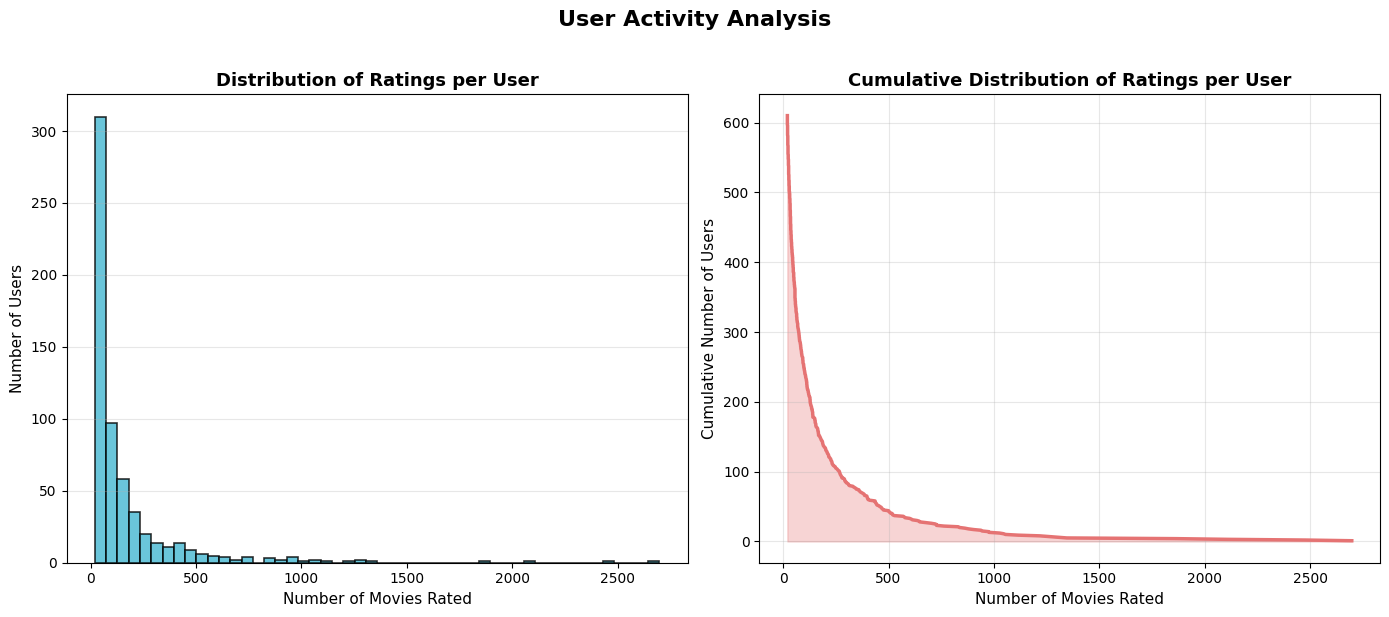

User rating statistics:
• Min ratings per user: 20
• Max ratings per user: 2698
• Mean ratings per user: 165.3
• Median ratings per user: 70.5
• Std ratings per user: 269.5

Top 10 users by number of ratings:
 1. User 414: 2698 ratings
 2. User 599: 2478 ratings
 3. User 474: 2108 ratings
 4. User 448: 1864 ratings
 5. User 274: 1346 ratings
 6. User 610: 1302 ratings
 7. User 68: 1260 ratings
 8. User 380: 1218 ratings
 9. User 606: 1115 ratings
10. User 288: 1055 ratings


In [65]:
# h) Plot: How many users have rated how many movies
# Calculate ratings per user
user_rating_counts = ratings.groupby('userId').size().sort_values(ascending=False)

plt.figure(figsize=(14, 6))

# Plot 1: Histogram of ratings per user
plt.subplot(1, 2, 1)
plt.hist(user_rating_counts, bins=50, alpha=0.8, color='#45B7D1', edgecolor='black', linewidth=1.2)
plt.xlabel('Number of Movies Rated', fontsize=11)
plt.ylabel('Number of Users', fontsize=11)
plt.title('Distribution of Ratings per User', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Plot 2: Cumulative distribution
plt.subplot(1, 2, 2)
sorted_counts = user_rating_counts.sort_values(ascending=False)
cumulative_users = np.arange(1, len(sorted_counts) + 1)
plt.plot(sorted_counts.values, cumulative_users, linewidth=2.5, color='#E57373')
plt.fill_between(sorted_counts.values, cumulative_users, alpha=0.3, color='#E57373')
plt.xlabel('Number of Movies Rated', fontsize=11)
plt.ylabel('Cumulative Number of Users', fontsize=11)
plt.title('Cumulative Distribution of Ratings per User', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.suptitle('User Activity Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"User rating statistics:")
print(f"• Min ratings per user: {user_rating_counts.min()}")
print(f"• Max ratings per user: {user_rating_counts.max()}")
print(f"• Mean ratings per user: {user_rating_counts.mean():.1f}")
print(f"• Median ratings per user: {user_rating_counts.median():.1f}")
print(f"• Std ratings per user: {user_rating_counts.std():.1f}")

print(f"\nTop 10 users by number of ratings:")
for i, (user_id, count) in enumerate(user_rating_counts.head(10).items(), 1):
    print(f"{i:2d}. User {user_id}: {count} ratings")

***Auswertung:***
- Die überwiegende Mehrheit der Benutzer hat nur sehr wenige Filme bewertet (Spitze ganz links)
- Typisch für Recommender Systems - wenige 'Power-User' dominieren die Bewertungsaktivität
- Einige Benutzer haben über 2000 Bewertungen abgegeben (long tail)
- Die meisten Benutzer sind 'Gelegenheitsbewerter'
- Die aktivsten 6 Benutzer (1%) haben über 1000 Bewertungen

***Bedeutung für Recommender Systems:***
- **COLD-START-PROBLEM**: Viele Benutzer mit wenigen Bewertungen
- **POWER-USER-BIAS**: Wenige aktive Benutzer dominieren die Daten
- **SPARSITY-HERAUSFORDERUNG**: Extreme Dünnbesiedelung der User-Item-Matrix
- **GEWICHTUNG**: Power-User sollten nicht übergewichtet werden


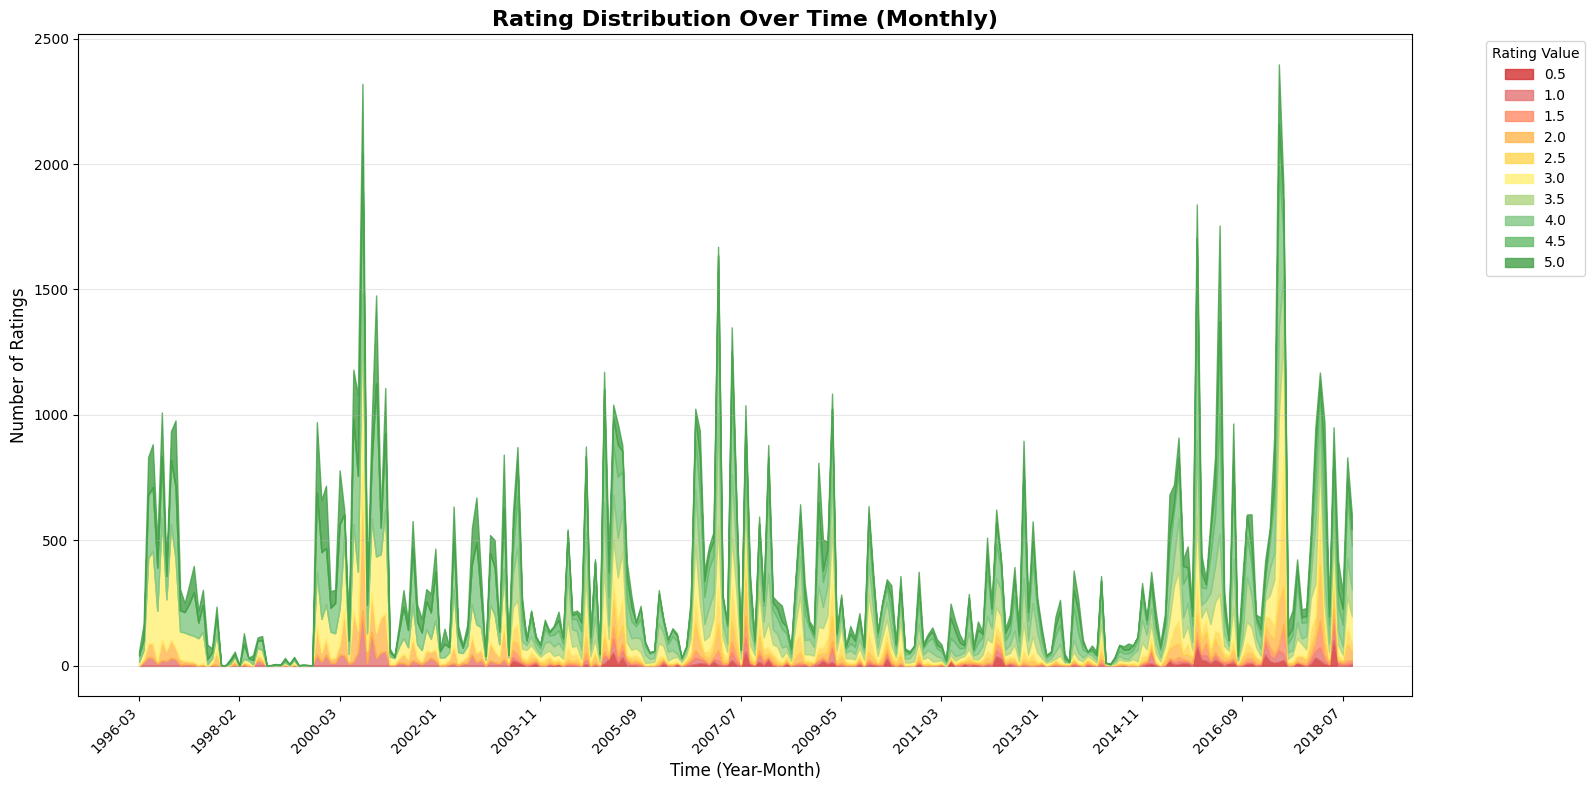

Monthly rating trends analysis:
• Dataset spans from 1996-03 to 2018-09
• Total months with data: 267
• Average ratings per month: 377.7

Top 5 months with most ratings:
• 2017-05: 2,397 ratings
• 2000-08: 2,319 ratings
• 2017-06: 1,910 ratings
• 2015-11: 1,839 ratings
• 2016-04: 1,755 ratings

Top 5 months with fewest ratings:
• 1997-10: 1 ratings
• 1998-02: 1 ratings
• 1998-10: 1 ratings
• 1999-09: 1 ratings
• 1999-06: 3 ratings


In [66]:
# i) Plot: Which rating is given how often over time with monthly resolution

# Add year-month column for time analysis
ratings['year_month'] = ratings['datetime'].dt.to_period('M')

# Count ratings by month and rating value
monthly_ratings = ratings.groupby(['year_month', 'rating']).size().unstack(fill_value=0)

# Ensure we have all rating values (0.5 to 5.0 in steps of 0.5)
all_ratings = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
for rating in all_ratings:
    if rating not in monthly_ratings.columns:
        monthly_ratings[rating] = 0

# Sort columns by rating value
monthly_ratings = monthly_ratings[sorted(monthly_ratings.columns)]

plt.figure(figsize=(16, 8))

# Custom color palette for ratings (from low to high)
rating_colors = {
    0.5: '#D32F2F', # Dunkles Rot
    1.0: '#E57373', # Mittleres Rot
    1.5: '#FF8A65', # Rot-Orange
    2.0: '#FFB74D', # Orange
    2.5: '#FFD54F', # Gelb-Orange
    3.0: '#FFF176', # Helles Gelb
    3.5: '#AED581', # Gelbgrün
    4.0: '#81C784', # Hellgrün
    4.5: '#66BB6A', # Mittelgrün
    5.0: '#43A047'  # Dunkelgrün
}

# Create the stacked area plot
x_values = range(len(monthly_ratings))
bottom = np.zeros(len(monthly_ratings))

for rating in monthly_ratings.columns:
    color = rating_colors.get(rating, '#CCCCCC')
    plt.fill_between(x_values, bottom, bottom + monthly_ratings[rating],
                     color=color, alpha=0.8, label=f'{rating}')
    bottom += monthly_ratings[rating]

plt.title('Rating Distribution Over Time (Monthly)', fontsize=16, fontweight='bold')
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.legend(title='Rating Value', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, ncol=1)
plt.grid(True, alpha=0.3, axis='y')

# Set x-axis labels
step = max(1, len(monthly_ratings) // 12)  # Zeige ca. 12 Labels
x_positions = range(0, len(monthly_ratings), step)
x_labels = [str(monthly_ratings.index[i]) for i in x_positions]
plt.xticks(x_positions, x_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Monthly rating trends analysis:")
print(f"• Dataset spans from {ratings['year_month'].min()} to {ratings['year_month'].max()}")
print(f"• Total months with data: {ratings['year_month'].nunique()}")
print(f"• Average ratings per month: {len(ratings) / ratings['year_month'].nunique():.1f}")

# Show some monthly statistics
monthly_totals = monthly_ratings.sum(axis=1)
print(f"\nTop 5 months with most ratings:")
for month, count in monthly_totals.nlargest(5).items():
    print(f"• {month}: {count:,} ratings")

print(f"\nTop 5 months with fewest ratings:")
for month, count in monthly_totals.nsmallest(5).items():
    print(f"• {month}: {count:,} ratings")

***Auswertung:***
- die Anzahl der Bewertungen schwanken stark
- in den letzten Jahren hat sich die Anzahl der Bewertungen erhöht
- Rating 4.0 ist die häufigste Bewertung
- Rating 3.0 und 5.0 sind die zweithäufigste Bewertungen
- Rating 1.0 und 2.0 sind die seltenste Bewertungen
- extreme Peaks bei den Top 5 Monaten 
- keine klaren saisonalen Muster erkennbar

***Bedeutung für Recommender Systems:***
- **ZEITLICHE FAKTOREN**: Bewertungsmuster ändern sich über Zeit
- **AKTIVITÄTSSCHWANKUNGEN**: Algorithmen müssen robust gegen Datenmangel sein
- **TREND-BERÜCKSICHTIGUNG**: Neuere Bewertungen könnten relevanter sein
- **SAISONALITÄT**: Keine starken saisonalen Effekte zu berücksichtigen
- **WACHSTUM**: System muss mit steigender Datenmenge skalieren

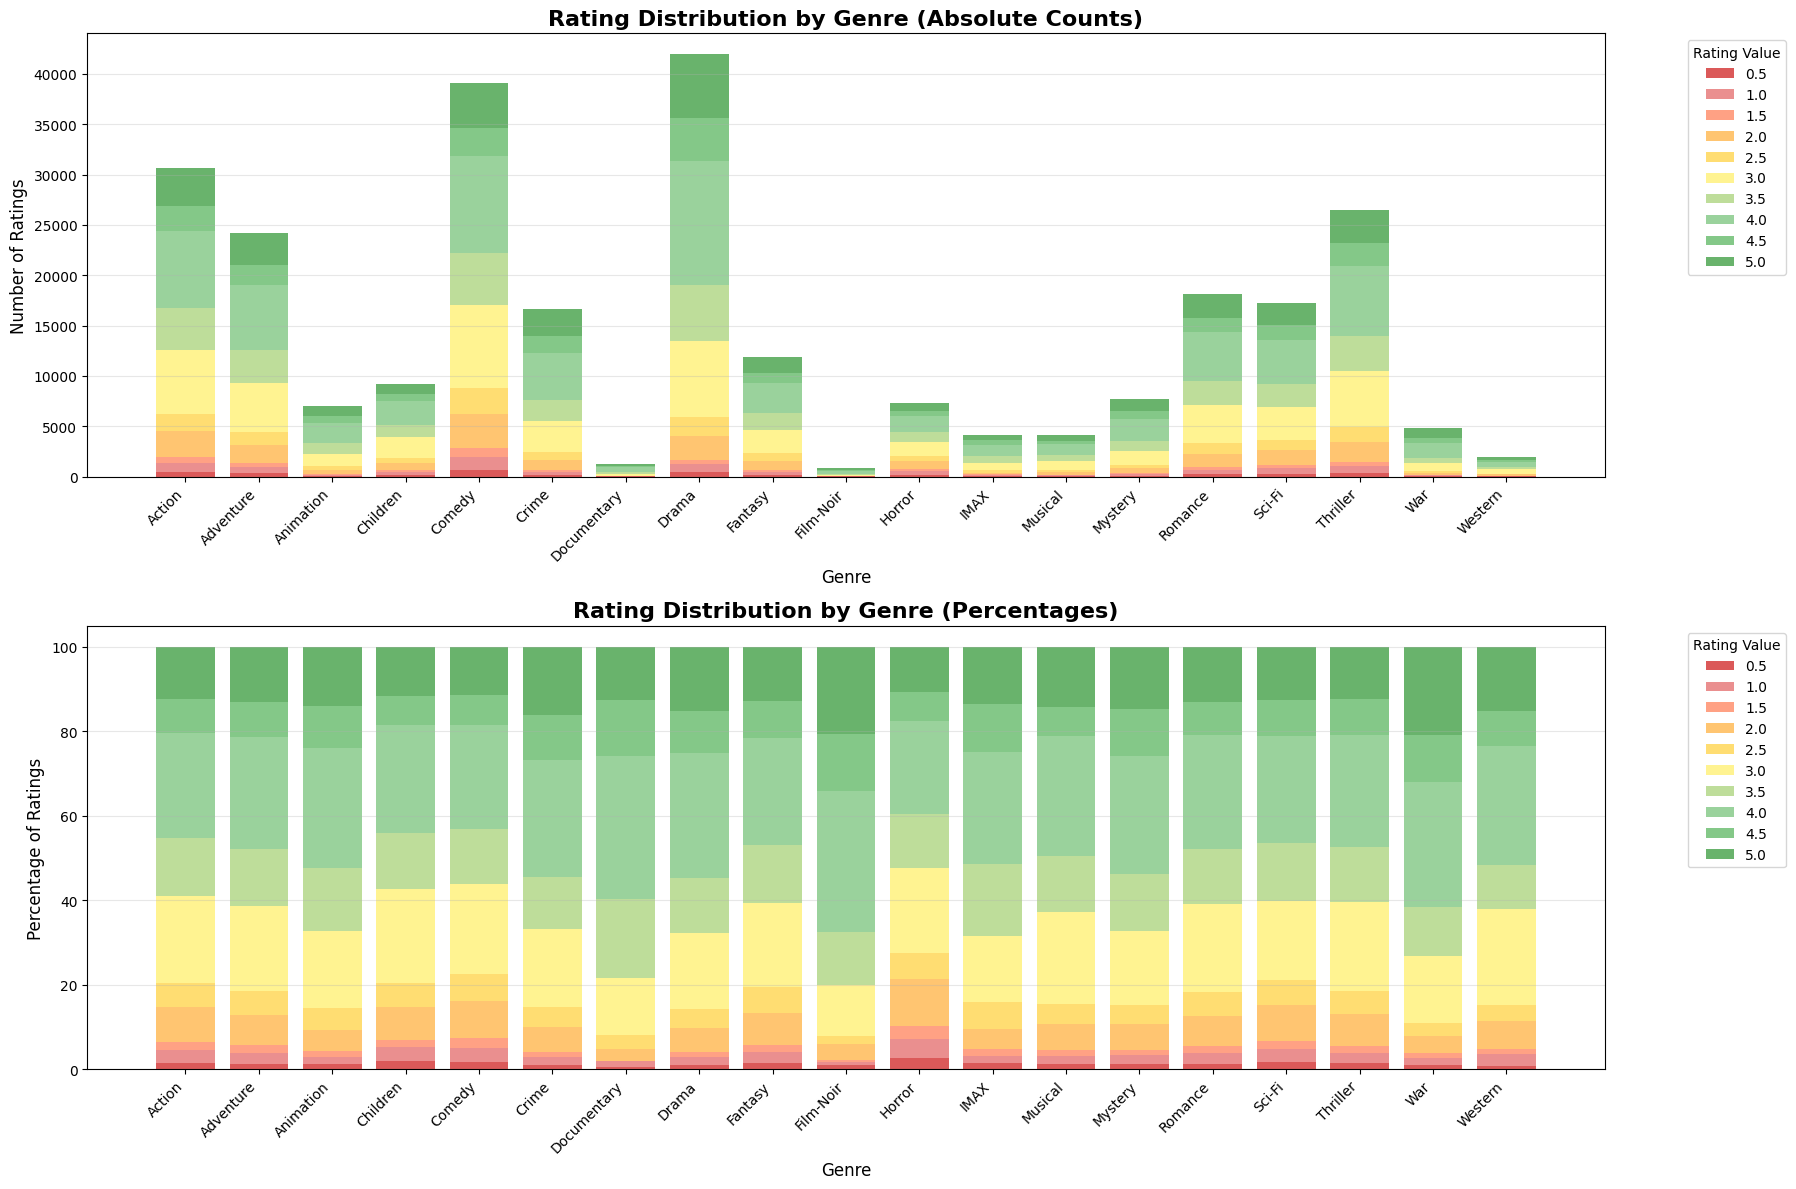

Genre rating analysis:

Average rating by genre:
• Film-Noir           : 3.920 (from 870 ratings)
• War                 : 3.808 (from 4,859 ratings)
• Documentary         : 3.798 (from 1,219 ratings)
• Crime               : 3.658 (from 16,681 ratings)
• Drama               : 3.656 (from 41,928 ratings)
• Mystery             : 3.632 (from 7,674 ratings)
• Animation           : 3.630 (from 6,988 ratings)
• IMAX                : 3.618 (from 4,145 ratings)
• Western             : 3.584 (from 1,930 ratings)
• Musical             : 3.564 (from 4,138 ratings)
• Adventure           : 3.509 (from 24,161 ratings)
• Romance             : 3.507 (from 18,124 ratings)
• Thriller            : 3.494 (from 26,452 ratings)
• Fantasy             : 3.491 (from 11,834 ratings)
• Sci-Fi              : 3.456 (from 17,243 ratings)
• Action              : 3.448 (from 30,635 ratings)
• Children            : 3.413 (from 9,208 ratings)
• Comedy              : 3.385 (from 39,053 ratings)
• Horror              : 3.

In [67]:
# j) Plot: Which rating is given how often per genre
# Use the genre_ratings data we created earlier
genre_rating_dist = genre_ratings.groupby(['genre', 'rating']).size().unstack(fill_value=0)

# Ensure we have all rating values (0.5 to 5.0 in steps of 0.5)
all_ratings = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
for rating in all_ratings:
    if rating not in genre_rating_dist.columns:
        genre_rating_dist[rating] = 0

# Sort columns by rating value
genre_rating_dist = genre_rating_dist[sorted(genre_rating_dist.columns)]

# Calculate percentages for each genre
genre_rating_pct = genre_rating_dist.div(genre_rating_dist.sum(axis=1), axis=0) * 100

# Custom color palette for ratings (same as time plot)
rating_colors = {
    0.5: '#D32F2F',  # Dunkles Rot
    1.0: '#E57373',  # Mittleres Rot
    1.5: '#FF8A65',  # Rot-Orange
    2.0: '#FFB74D',  # Orange
    2.5: '#FFD54F',  # Gelb-Orange
    3.0: '#FFF176',  # Helles Gelb
    3.5: '#AED581',  # Gelbgrün
    4.0: '#81C784',  # Hellgrün
    4.5: '#66BB6A',  # Mittelgrün
    5.0: '#43A047'   # Dunkelgrün
}

plt.figure(figsize=(18, 12))

# Plot 1: Stacked bar chart of absolute counts
plt.subplot(2, 1, 1)

# Create colors array for the plot
colors = [rating_colors.get(rating, '#CCCCCC') for rating in genre_rating_dist.columns]

# Create the stacked bar chart manually for better control
bottom = np.zeros(len(genre_rating_dist))
for i, rating in enumerate(genre_rating_dist.columns):
    plt.bar(range(len(genre_rating_dist)), genre_rating_dist[rating],
            bottom=bottom, color=colors[i], alpha=0.8, label=f'{rating}')
    bottom += genre_rating_dist[rating]

plt.title('Rating Distribution by Genre (Absolute Counts)', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.legend(title='Rating Value', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(range(len(genre_rating_dist)), genre_rating_dist.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Plot 2: Stacked bar chart of percentages
plt.subplot(2, 1, 2)

# Create the stacked bar chart manually for percentages
bottom = np.zeros(len(genre_rating_pct))
for i, rating in enumerate(genre_rating_pct.columns):
    plt.bar(range(len(genre_rating_pct)), genre_rating_pct[rating],
            bottom=bottom, color=colors[i], alpha=0.8, label=f'{rating}')
    bottom += genre_rating_pct[rating]

plt.title('Rating Distribution by Genre (Percentages)', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Percentage of Ratings', fontsize=12)
plt.legend(title='Rating Value', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(range(len(genre_rating_pct)), genre_rating_pct.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Genre rating analysis:")
print("\nAverage rating by genre:")
avg_rating_by_genre = genre_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)
for genre, avg_rating in avg_rating_by_genre.items():
    total_ratings = genre_rating_dist.loc[genre].sum()
    print(f"• {genre:<20}: {avg_rating:.3f} (from {total_ratings:,} ratings)")

print(f"\nMost common rating by genre:")
for genre in genre_rating_dist.index:
    most_common_rating = genre_rating_dist.loc[genre].idxmax()
    count = genre_rating_dist.loc[genre].max()
    percentage = (count / genre_rating_dist.loc[genre].sum()) * 100
    print(f"• {genre:<20}: Rating {most_common_rating} ({count:,} ratings, {percentage:.1f}%)")

***Auswertung:***
- Drama hat die höchste durchschnittliche Bewertung, danach kommen Komedien und Action
- Film-Noir und Western haben die niedrigste durchschnittliche Bewertung
- verdeutlicht nochmals, dass Rating 4.0 die häufigste Bewertung ist
- überwiegend positive Bewertungen
- Nischengenres haben höhere durchschnittliche Bewertungen
- Mainstream Genres haben eher moderate Bewertungen


***Bedeutung für Recommender Systems:***
- **ZIELGRUPPEN-SEGMENTIERUNG**: Unterschiedliche Benutzerpräferenzen
- **PERSONALISIERUNG**: Genre-Präferenzen als Basis für Empfehlungen
- **COLD-START**: Genre-Information hilft bei neuen Filmen


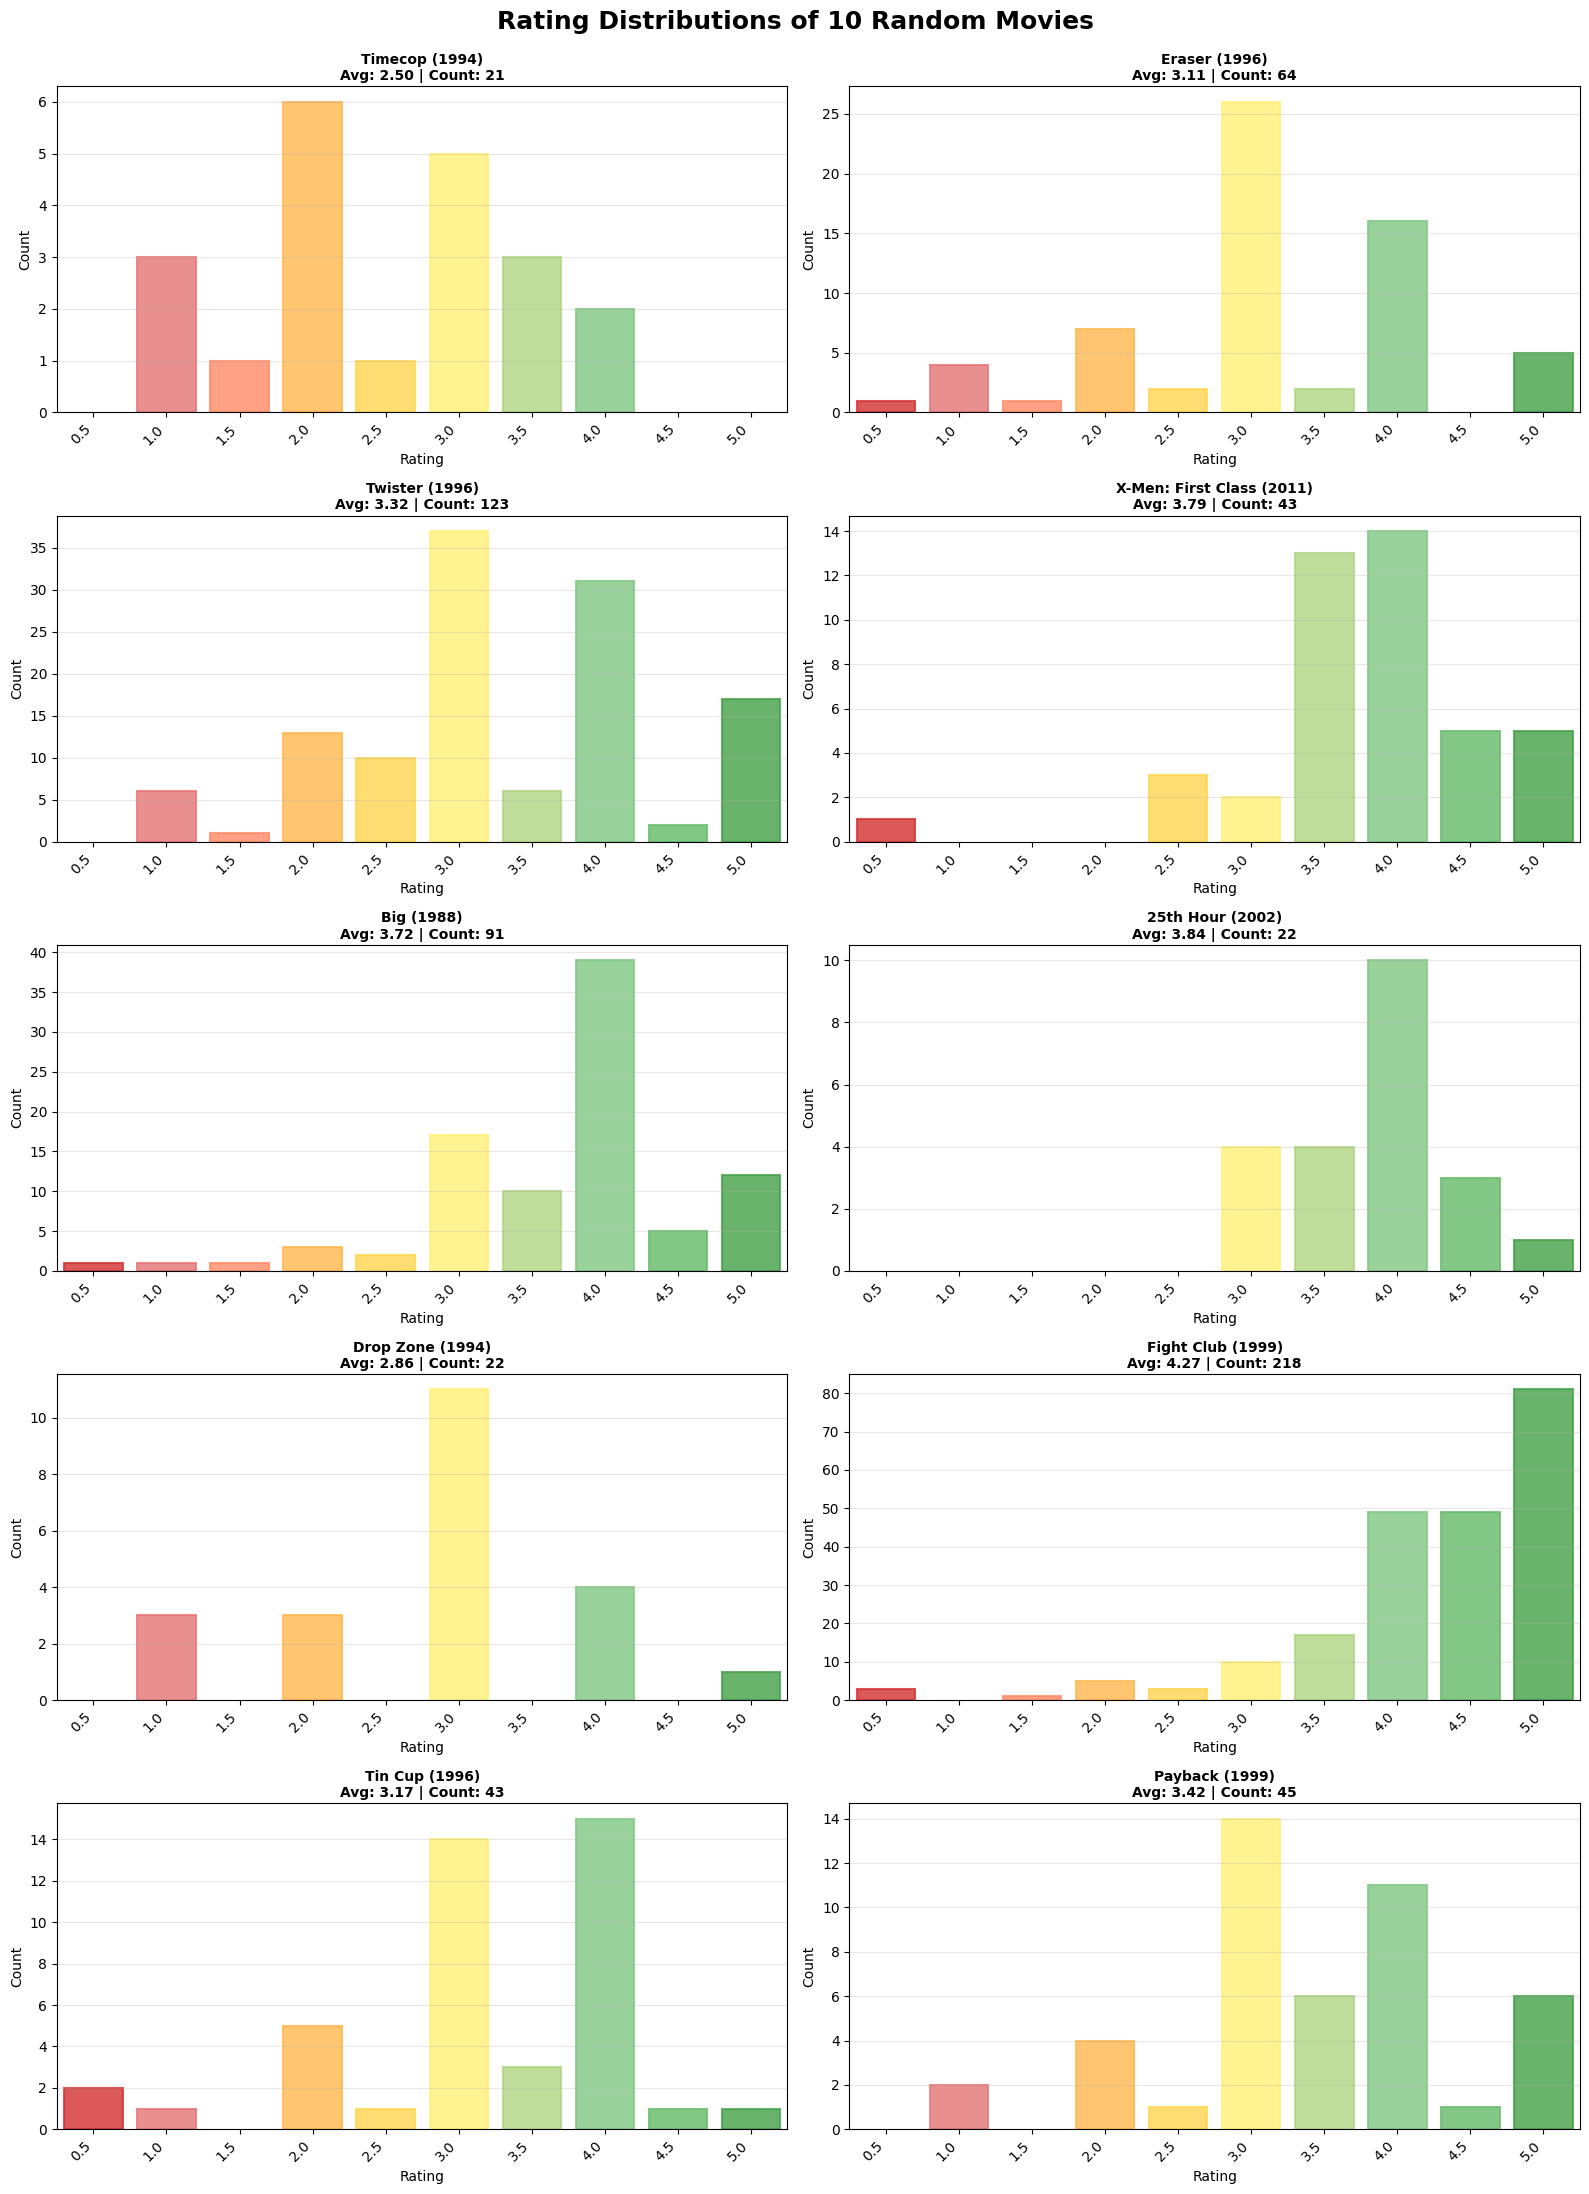

Random movies selected for analysis:
 1. Timecop (1994) (ID: 379) - Avg: 2.500, Count: 21
 2. Eraser (1996) (ID: 786) - Avg: 3.109, Count: 64
 3. Twister (1996) (ID: 736) - Avg: 3.321, Count: 123
 4. X-Men: First Class (2011) (ID: 87232) - Avg: 3.791, Count: 43
 5. Big (1988) (ID: 2797) - Avg: 3.720, Count: 91
 6. 25th Hour (2002) (ID: 5954) - Avg: 3.841, Count: 22
 7. Drop Zone (1994) (ID: 227) - Avg: 2.864, Count: 22
 8. Fight Club (1999) (ID: 2959) - Avg: 4.273, Count: 218
 9. Tin Cup (1996) (ID: 852) - Avg: 3.174, Count: 43
10. Payback (1999) (ID: 2490) - Avg: 3.422, Count: 45


In [68]:
# k) Plot: Rating distributions of 10 random movies
# Select 10 random movies that have at least 20 ratings for better visualization
movies_with_sufficient_ratings = movie_stats[movie_stats['rating_count'] >= 20]['movieId'].tolist()
random_movies = np.random.choice(movies_with_sufficient_ratings, size=10, replace=False)

# Color palette for ratings
rating_colors = {
    0.5: '#D32F2F',  # Dunkles Rot
    1.0: '#E57373',  # Mittleres Rot
    1.5: '#FF8A65',  # Rot-Orange
    2.0: '#FFB74D',  # Orange
    2.5: '#FFD54F',  # Gelb-Orange
    3.0: '#FFF176',  # Helles Gelb
    3.5: '#AED581',  # Gelbgrün
    4.0: '#81C784',  # Hellgrün
    4.5: '#66BB6A',  # Mittelgrün
    5.0: '#43A047'   # Dunkelgrün
}

plt.figure(figsize=(16, 22))

for i, movie_id in enumerate(random_movies, 1):
    plt.subplot(5, 2, i)
    
    # Get ratings for this movie
    movie_ratings = ratings[ratings['movieId'] == movie_id]['rating']
    
    # Count ratings for each value
    rating_counts = movie_ratings.value_counts().sort_index()
    
    # Create bar chart with colors
    bars = plt.bar(rating_counts.index, rating_counts.values, 
                   width=0.4, edgecolor='black', linewidth=1.5)
    
    # Color each bar according to the rating
    for bar, rating in zip(bars, rating_counts.index):
        bar.set_color(rating_colors.get(rating, '#CCCCCC'))
        bar.set_alpha(0.8)
    
    # Get movie title
    movie_title = movies[movies['movieId'] == movie_id]['title'].iloc[0]
    avg_rating = movie_ratings.mean()
    rating_count = len(movie_ratings)
    
    plt.title(f'{movie_title}\nAvg: {avg_rating:.2f} | Count: {rating_count}',
              fontsize=10, fontweight='bold', wrap=True)
    plt.xlabel('Rating', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], 
               rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.xlim(0.25, 5.25)

plt.suptitle('Rating Distributions of 10 Random Movies', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("Random movies selected for analysis:")
for i, movie_id in enumerate(random_movies, 1):
    movie_title = movies[movies['movieId'] == movie_id]['title'].iloc[0]
    movie_ratings = ratings[ratings['movieId'] == movie_id]['rating']
    avg_rating = movie_ratings.mean()
    rating_count = len(movie_ratings)
    print(f"{i:2d}. {movie_title} (ID: {movie_id}) - Avg: {avg_rating:.3f}, Count: {rating_count}")

***Auswertung:***
- unterschiedliche Bewertungsmuster, dennoch Rating 4.0 meistens am häufigsten
- durchschnittliche Bewertungsbereich zwischen 3.5 und 4.1


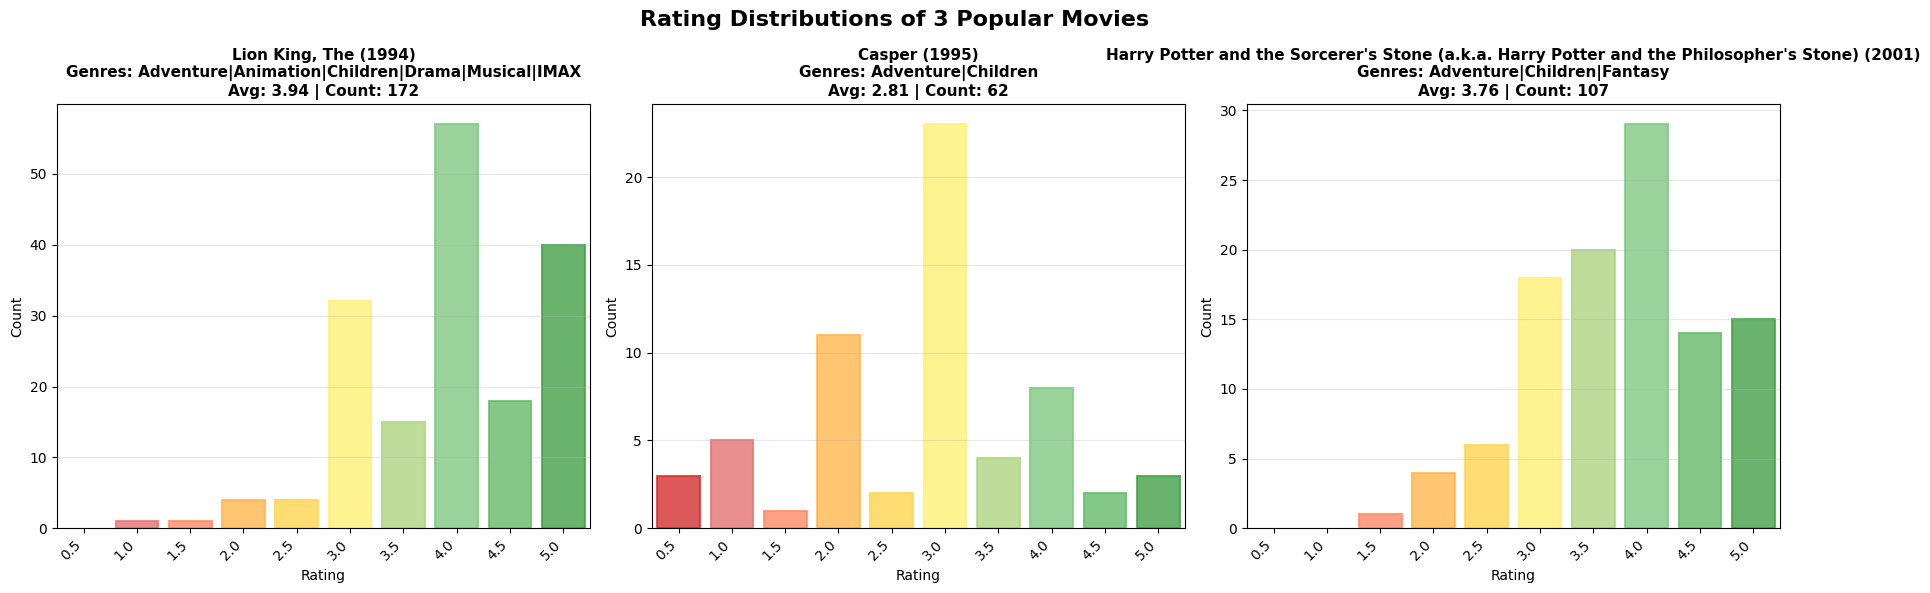

Movies selected for analysis:
1. Lion King, The (1994)
   Genres: Adventure|Animation|Children|Drama|Musical|IMAX
   Average Rating: 3.942
   Rating Count: 172
   Standard Deviation: 0.837

2. Casper (1995)
   Genres: Adventure|Children
   Average Rating: 2.806
   Rating Count: 62
   Standard Deviation: 1.114

3. Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
   Genres: Adventure|Children|Fantasy
   Average Rating: 3.762
   Rating Count: 107
   Standard Deviation: 0.819



In [69]:
# l) Plot: Rating distributions of 3 movies that you have watched
familiar_movies = []

# Films that I have watched
movie_search_terms = ['Lion King', 'Casper', "Harry Potter and the Sorcerer's Stone"]

for term in movie_search_terms:
    matching_movies = movies[movies['title'].str.contains(term, case=False, na=False)]
    if not matching_movies.empty:
        # Get the first match and check if it has sufficient ratings
        movie_id = matching_movies.iloc[0]['movieId']
        if movie_id in movie_stats[movie_stats['rating_count'] >= 50]['movieId'].values:
            familiar_movies.append(movie_id)

# Color palette for ratings
rating_colors = {
    0.5: '#D32F2F',  # Dunkles Rot
    1.0: '#E57373',  # Mittleres Rot
    1.5: '#FF8A65',  # Rot-Orange
    2.0: '#FFB74D',  # Orange
    2.5: '#FFD54F',  # Gelb-Orange
    3.0: '#FFF176',  # Helles Gelb
    3.5: '#AED581',  # Gelbgrün
    4.0: '#81C784',  # Hellgrün
    4.5: '#66BB6A',  # Mittelgrün
    5.0: '#43A047'   # Dunkelgrün
}

plt.figure(figsize=(18, 6))

for i, movie_id in enumerate(familiar_movies[:3], 1):
    plt.subplot(1, 3, i)
    
    # Get ratings for this movie
    movie_ratings = ratings[ratings['movieId'] == movie_id]['rating']
    
    # Count ratings for each value
    rating_counts = movie_ratings.value_counts().sort_index()
    
    # Create bar chart with colors
    bars = plt.bar(rating_counts.index, rating_counts.values, 
                   width=0.4, edgecolor='black', linewidth=1.5)
    
    # Color each bar according to the rating
    for bar, rating in zip(bars, rating_counts.index):
        bar.set_color(rating_colors.get(rating, '#CCCCCC'))
        bar.set_alpha(0.8)
    
    # Get movie title and stats
    movie_title = movies[movies['movieId'] == movie_id]['title'].iloc[0]
    movie_genres = movies[movies['movieId'] == movie_id]['genres'].iloc[0]
    avg_rating = movie_ratings.mean()
    rating_count = len(movie_ratings)
    
    plt.title(f'{movie_title}\nGenres: {movie_genres}\nAvg: {avg_rating:.2f} | Count: {rating_count}',
              fontsize=11, fontweight='bold')
    plt.xlabel('Rating', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], 
               rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.xlim(0.25, 5.25)

plt.suptitle('Rating Distributions of 3 Popular Movies', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Movies selected for analysis:")
for i, movie_id in enumerate(familiar_movies[:3], 1):
    movie_title = movies[movies['movieId'] == movie_id]['title'].iloc[0]
    movie_genres = movies[movies['movieId'] == movie_id]['genres'].iloc[0]
    movie_ratings = ratings[ratings['movieId'] == movie_id]['rating']
    avg_rating = movie_ratings.mean()
    rating_count = len(movie_ratings)
    std_rating = movie_ratings.std()
    print(f"{i}. {movie_title}")
    print(f"   Genres: {movie_genres}")
    print(f"   Average Rating: {avg_rating:.3f}")
    print(f"   Rating Count: {rating_count}")
    print(f"   Standard Deviation: {std_rating:.3f}")
    print()

***Auswertung:***
- König der Löwen: zwar ein alter Kinderfilm, dennoch kennen ihn heutzutage viele, darum gibt es verhältnismässig viele Bewertungen (etwas über dem Schnitt), wie zu erwarten ein durchschnittliches Rating von 4.0
- Casper: einer meiner absoluten Lieblingsfilme, daher schokiert mich die niedrige Bewertung :(, ebenfalls ein alter Film, wodurch wie zu erwarten eher wenige Bewertungen vorhanden sind.
- Harry Potter: ein sehr bekannter Film, jedoch verhältnismässig wenige Bewertungen, aber auch hier die meisten Ratings sind 4.0
- interessant sind ebenfalls die Genres, Casper ist ebenfalls ein Animationsfilm ist jedoch nicht als solcher gelabelt und das Genre *MAX* habe ich noch nie gesehen.

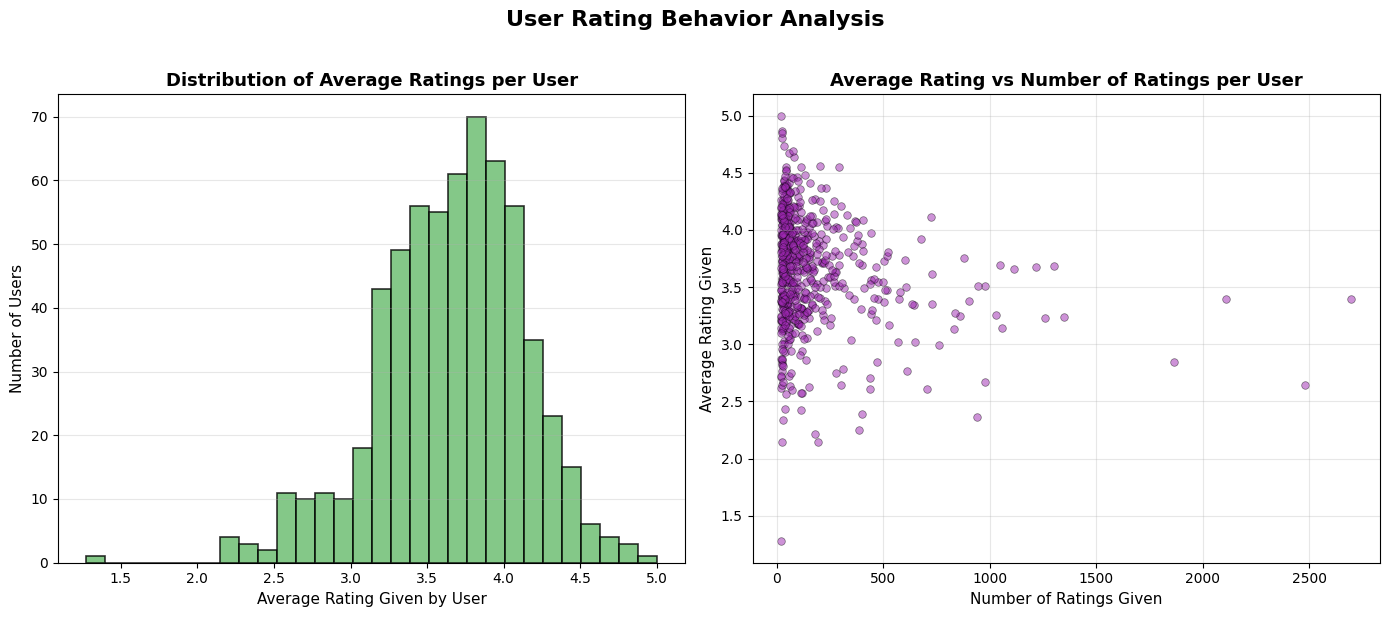

User average rating statistics:
• Min average rating: 1.275
• Max average rating: 5.000
• Mean average rating: 3.657
• Median average rating: 3.694
• Std average rating: 0.481

Users with highest average ratings:
• User 53.0: 5.000 (from 20.0 ratings)
• User 251.0: 4.870 (from 23.0 ratings)
• User 515.0: 4.846 (from 26.0 ratings)
• User 25.0: 4.808 (from 26.0 ratings)
• User 30.0: 4.735 (from 34.0 ratings)
• User 523.0: 4.693 (from 75.0 ratings)
• User 348.0: 4.673 (from 55.0 ratings)
• User 171.0: 4.634 (from 82.0 ratings)
• User 452.0: 4.557 (from 202.0 ratings)
• User 43.0: 4.553 (from 114.0 ratings)

Users with lowest average ratings:
• User 442.0: 1.275 (from 20.0 ratings)
• User 139.0: 2.144 (from 194.0 ratings)
• User 508.0: 2.146 (from 24.0 ratings)
• User 153.0: 2.218 (from 179.0 ratings)
• User 567.0: 2.245 (from 385.0 ratings)
• User 311.0: 2.339 (from 28.0 ratings)
• User 298.0: 2.364 (from 939.0 ratings)
• User 517.0: 2.386 (from 400.0 ratings)
• User 308.0: 2.426 (from 11

In [70]:
# m) Plot: How many users give which average rating
# Calculate average rating per user
user_avg_ratings = ratings.groupby('userId')['rating'].agg(['mean', 'count']).reset_index()
user_avg_ratings.columns = ['userId', 'avg_rating', 'rating_count']

plt.figure(figsize=(14, 6))

# Plot 1: Histogram of average ratings per user
plt.subplot(1, 2, 1)
plt.hist(user_avg_ratings['avg_rating'], bins=30, alpha=0.8, color='#66BB6A', 
         edgecolor='black', linewidth=1.2)
plt.xlabel('Average Rating Given by User', fontsize=11)
plt.ylabel('Number of Users', fontsize=11)
plt.title('Distribution of Average Ratings per User', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Plot 2: Scatter plot of average rating vs number of ratings
plt.subplot(1, 2, 2)
plt.scatter(user_avg_ratings['rating_count'], user_avg_ratings['avg_rating'],
            alpha=0.5, color='#9C27B0', s=30, edgecolors='black', linewidth=0.5)
plt.xlabel('Number of Ratings Given', fontsize=11)
plt.ylabel('Average Rating Given', fontsize=11)
plt.title('Average Rating vs Number of Ratings per User', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.suptitle('User Rating Behavior Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("User average rating statistics:")
print(f"• Min average rating: {user_avg_ratings['avg_rating'].min():.3f}")
print(f"• Max average rating: {user_avg_ratings['avg_rating'].max():.3f}")
print(f"• Mean average rating: {user_avg_ratings['avg_rating'].mean():.3f}")
print(f"• Median average rating: {user_avg_ratings['avg_rating'].median():.3f}")
print(f"• Std average rating: {user_avg_ratings['avg_rating'].std():.3f}")

print(f"\nUsers with highest average ratings:")
top_raters = user_avg_ratings.nlargest(10, 'avg_rating')
for idx, row in top_raters.iterrows():
    print(f"• User {row['userId']}: {row['avg_rating']:.3f} (from {row['rating_count']} ratings)")

print(f"\nUsers with lowest average ratings:")
low_raters = user_avg_ratings.nsmallest(10, 'avg_rating')
for idx, row in low_raters.iterrows():
    print(f"• User {row['userId']}: {row['avg_rating']:.3f} (from {row['rating_count']} ratings)")

***Auswertung:***
- Die meisten Nutzer bewerten Filme im Bereich zwischen 3.5 und 4.0 Sternen
- Die Verteilung ist leicht linkslastig (negativ schief), was bedeutet, dass Nutzer tendenziell eher positive Bewertungen abgeben
- Die geringe Standardabweichung (0.481) zeigt, dass die meisten Nutzer ein ähnliches durchschnittliches Bewertungsniveau haben
- Sehr wenige Nutzer sind extreme "Kritiker" (Durchschnitt < 2.5) oder "Enthusiasten" (Durchschnitt > 4.5)
- Nutzer mit vielen Bewertungen (>500) tendieren zu einem Durchschnitt um 3.5-4.0
- Dies deutet auf einen "Regression zur Mitte"-Effekt hin: Je mehr Filme bewertet werden, desto näher liegt der Durchschnitt am Gesamtdurchschnitt
- Nutzer mit wenigen Bewertungen (<100) zeigen eine große Streuung (1.5 bis 5.0)
- Dies ist statistisch zu erwarten: Bei kleinen Stichproben sind extreme Durchschnitte wahrscheinlicher


***Schlussfolgerung:***
- Nutzer schauen und bewerten wahrscheinlich eher Filme, die sie mögen, was den positiven Bias erklärt
- Je mehr ein Nutzer bewertet, desto näher liegt sein Durchschnitt am Gesamtdurchschnitt (3.5-4.0)
- Nur wenige sehr aktive Nutzer haben Durchschnitte <2.5, was auf echte Kritiker oder sehr wählerische Zuschauer hindeutet
- Bei Nutzern mit <50 Bewertungen sollten Empfehlungen vorsichtig interpretiert werden
- Nutzer mit extremen Durchschnitten (>4.5 oder <2.5) und >100 Bewertungen sind interessante Ausreißer für weitere Analyse

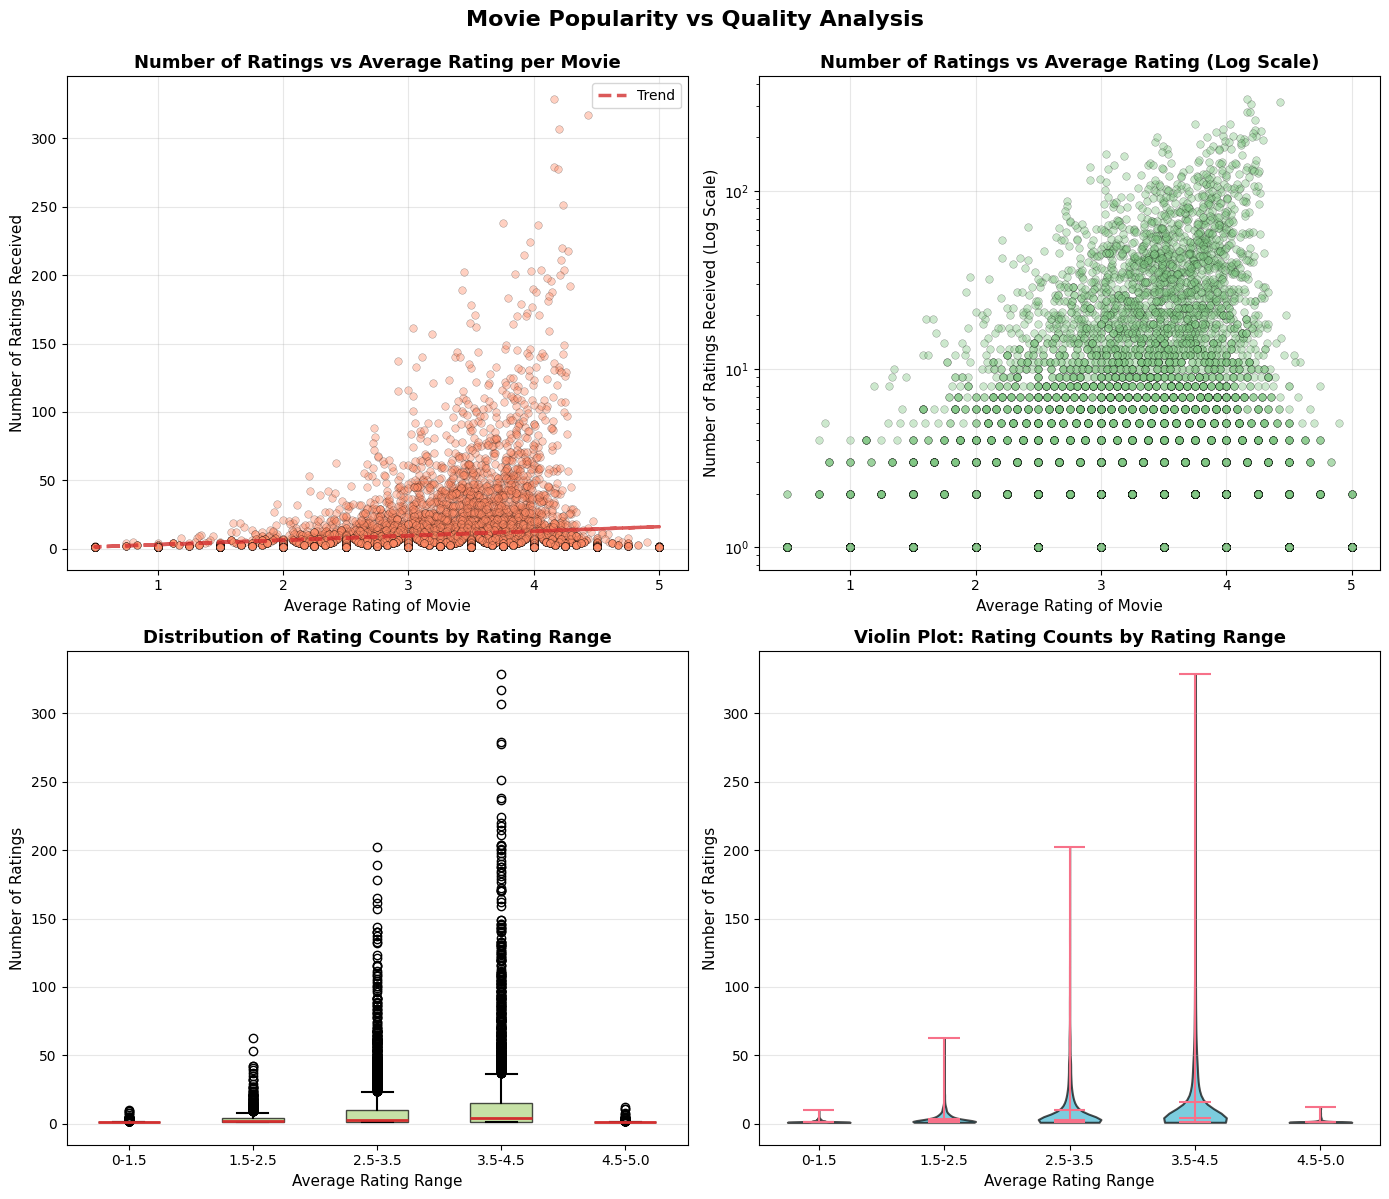

Movie rating analysis:
• Correlation between average rating and number of ratings: 0.127

Statistics by rating range:
• 0-1.5: 511 movies, avg ratings count: 1.4, median: 1.0
• 1.5-2.5: 1486 movies, avg ratings count: 3.8, median: 2.0
• 2.5-3.5: 3959 movies, avg ratings count: 9.9, median: 3.0
• 3.5-4.5: 3424 movies, avg ratings count: 16.0, median: 4.0
• 4.5-5.0: 344 movies, avg ratings count: 1.4, median: 1.0

Top 5 movies by average rating:
• Lamerica (1994): 5.000 (from 2 ratings)
• Heidi Fleiss: Hollywood Madam (1995): 5.000 (from 2 ratings)
• Awfully Big Adventure, An (1995): 5.000 (from 1 ratings)
• Live Nude Girls (1995): 5.000 (from 1 ratings)
• In the Realm of the Senses (Ai no corrida) (1976): 5.000 (from 1 ratings)

Most rated movies:
• Forrest Gump (1994): 329 ratings (avg: 4.164)
• Shawshank Redemption, The (1994): 317 ratings (avg: 4.429)
• Pulp Fiction (1994): 307 ratings (avg: 4.197)
• Silence of the Lambs, The (1991): 279 ratings (avg: 4.161)
• Matrix, The (1999): 278

In [71]:
# n) Plot: How often a movie was rated as a function of average rating
plt.figure(figsize=(14, 12))

# Plot 1: Scatter plot with hexbin overlay
plt.subplot(2, 2, 1)
plt.scatter(movie_stats['avg_rating'], movie_stats['rating_count'],
            alpha=0.4, color='#FF8A65', s=30, edgecolors='black', linewidth=0.3)
plt.xlabel('Average Rating of Movie', fontsize=11)
plt.ylabel('Number of Ratings Received', fontsize=11)
plt.title('Number of Ratings vs Average Rating per Movie', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(movie_stats['avg_rating'], movie_stats['rating_count'], 1)
p = np.poly1d(z)
plt.plot(movie_stats['avg_rating'], p(movie_stats['avg_rating']), 
         color='#D32F2F', linestyle='--', alpha=0.8, linewidth=2.5, label='Trend')
plt.legend()

# Plot 2: Log scale scatter plot
plt.subplot(2, 2, 2)
plt.scatter(movie_stats['avg_rating'], movie_stats['rating_count'],
            alpha=0.4, color='#81C784', s=30, edgecolors='black', linewidth=0.3)
plt.xlabel('Average Rating of Movie', fontsize=11)
plt.ylabel('Number of Ratings Received (Log Scale)', fontsize=11)
plt.title('Number of Ratings vs Average Rating (Log Scale)', fontsize=13, fontweight='bold')
plt.yscale('log')
plt.grid(True, alpha=0.3)

# Plot 3: Box plot by rating bins
plt.subplot(2, 2, 3)

# Create rating bins
movie_stats['rating_bin'] = pd.cut(movie_stats['avg_rating'],
                                    bins=[0, 1.5, 2.5, 3.5, 4.5, 5.0],
                                    labels=['0-1.5', '1.5-2.5', '2.5-3.5', '3.5-4.5', '4.5-5.0'])

# Create box plot data
rating_bins = []
rating_counts_by_bin = []
for bin_label in movie_stats['rating_bin'].cat.categories:
    bin_data = movie_stats[movie_stats['rating_bin'] == bin_label]['rating_count']
    if len(bin_data) > 0:
        rating_bins.append(bin_label)
        rating_counts_by_bin.append(bin_data)

# Create colorful box plot
box = plt.boxplot(rating_counts_by_bin, labels=rating_bins, patch_artist=True,
                  boxprops=dict(facecolor='#AED581', alpha=0.7),
                  medianprops=dict(color='#D32F2F', linewidth=2),
                  whiskerprops=dict(color='black', linewidth=1.5),
                  capprops=dict(color='black', linewidth=1.5))

plt.xlabel('Average Rating Range', fontsize=11)
plt.ylabel('Number of Ratings', fontsize=11)
plt.title('Distribution of Rating Counts by Rating Range', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Plot 4: Violin plot by rating bins
plt.subplot(2, 2, 4)

# Prepare data for violin plot
violin_data = [movie_stats[movie_stats['rating_bin'] == bin_label]['rating_count'].values 
               for bin_label in movie_stats['rating_bin'].cat.categories 
               if len(movie_stats[movie_stats['rating_bin'] == bin_label]) > 0]

parts = plt.violinplot(violin_data, positions=range(len(rating_bins)), 
                       showmeans=True, showmedians=True)

# Color the violin plots
for pc in parts['bodies']:
    pc.set_facecolor('#45B7D1')
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')
    pc.set_linewidth(1.5)

plt.xticks(range(len(rating_bins)), rating_bins)
plt.xlabel('Average Rating Range', fontsize=11)
plt.ylabel('Number of Ratings', fontsize=11)
plt.title('Violin Plot: Rating Counts by Rating Range', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.suptitle('Movie Popularity vs Quality Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("Movie rating analysis:")
print(f"• Correlation between average rating and number of ratings: {movie_stats['avg_rating'].corr(movie_stats['rating_count']):.3f}")

print(f"\nStatistics by rating range:")
for bin_label in movie_stats['rating_bin'].cat.categories:
    bin_data = movie_stats[movie_stats['rating_bin'] == bin_label]
    if len(bin_data) > 0:
        print(f"• {bin_label}: {len(bin_data)} movies, avg ratings count: {bin_data['rating_count'].mean():.1f}, median: {bin_data['rating_count'].median():.1f}")

print(f"\nTop 5 movies by average rating:")
top_rated = movie_stats.nlargest(5, 'avg_rating')
for idx, row in top_rated.iterrows():
    print(f"• {row['title']}: {row['avg_rating']:.3f} (from {row['rating_count']} ratings)")

print(f"\nMost rated movies:")
most_rated = movie_stats.nlargest(5, 'rating_count')
for idx, row in most_rated.iterrows():
    print(f"• {row['title']}: {row['rating_count']} ratings (avg: {row['avg_rating']:.3f})")

***Auswertung:***

- Schwache positive Korrelation (0.127) zwischen Filmqualität und Popularität. Qualität garantiert keine hohe Bewertungsanzahl
- 76% aller Filme liegen im Bewertungsbereich 2.5-4.5, extreme Bewertungen (<1.5 oder >4.5) sind selten
- Filme mit Bewertungen zwischen 3.5-4.5 erhalten durchschnittlich die meisten Bewertungen (Ø 16.0)
- Perfekt bewertete Filme (4.5-5.0) haben paradoxerweise nur Ø 1.4 Bewertungen. Meist nur 1-2 Bewertungen, statistische Verzerrung
Die Verteilung folgt einem Power-Law-Muster: Wenige Blockbuster erhalten viele Bewertungen (bis 329), die Mehrheit bleibt bei <10 Bewertungen
- Box Plot zeigt extreme Ausreißer in allen Kategorien, die größte Varianz liegt im Bereich 3.5-4.5
Top 5 meist-bewertete Filme haben alle Ratings zwischen 4.16-4.43. Kombination aus hoher Qualität und breiter Zugänglichkeit
- Alle "perfekten" 5.0-Filme haben ≤2 Bewertungen, keine statistische Signifikanz

***Schlussfolgerung:***

- Marketing, Starbesetzung und Zugänglichkeit sind wichtiger für Popularität als reine Filmqualität
- Der "Goldene Bereich" (3.5-4.5) maximiert sowohl Qualität als auch Popularität
- Long Tail-Verteilung: Top 1-2% der Filme erhalten die meisten Bewertungen, die Mehrheit bleibt unbekannt (Median: 3 Bewertungen)
- Empfehlungssysteme sollten Mindestanzahl von 10-20 Bewertungen fordern, um verlässliche Durchschnitte zu garantieren
- Nischen-Filme mit wenigen aber hohen Bewertungen (z.B. 15 Bewertungen, Ø 4.5) könnten versteckte Qualität sein

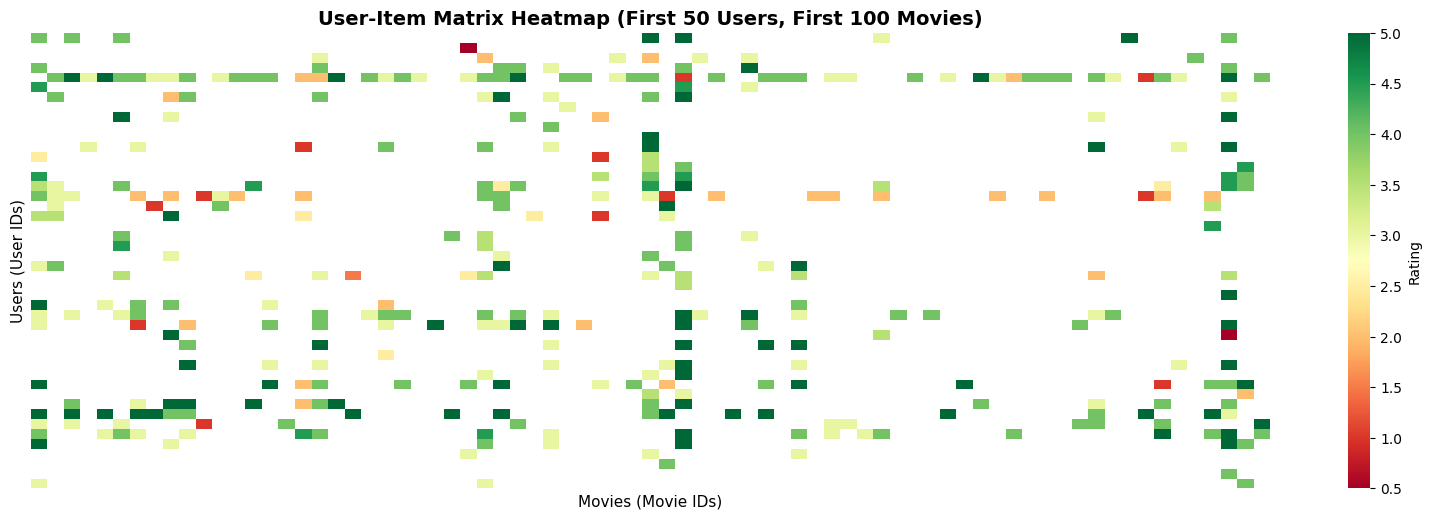

User-Item Matrix Heatmap Analysis:
• Subset size: 46 users × 75 movies
• Total possible ratings in subset: 3,450
• Actual ratings in subset: 362
• Sparsity of subset: 0.895 (89.5%)


In [72]:
# o) Plot: A heatmap of the User Item Matrix
# For visualization purposes, we'll create a smaller subset of the matrix
# take the first 50 users and first 100 movies for better visualization
subset_users = sorted(ratings['userId'].unique())[:50]
subset_movies = sorted(ratings['movieId'].unique())[:100]

# Create subset of ratings
subset_ratings = ratings[
    (ratings['userId'].isin(subset_users)) &
    (ratings['movieId'].isin(subset_movies))
]

# Create user-item matrix for the subset
subset_matrix = subset_ratings.pivot_table(index='userId', columns='movieId', values='rating')

fig = plt.figure(figsize=(16, 10))

# Plot 1: Main heatmap
ax1 = plt.subplot(2, 2, (1, 2))
sns.heatmap(subset_matrix, cmap='RdYlGn', cbar=True,
            xticklabels=False, yticklabels=False,
            cbar_kws={'label': 'Rating'}, vmin=0.5, vmax=5.0)
plt.title('User-Item Matrix Heatmap (First 50 Users, First 100 Movies)',
          fontsize=14, fontweight='bold')
plt.xlabel('Movies (Movie IDs)', fontsize=11)
plt.ylabel('Users (User IDs)', fontsize=11)

plt.tight_layout()
plt.show()

# Calculate statistics
total_possible = subset_matrix.shape[0] * subset_matrix.shape[1]
actual_ratings = subset_matrix.notna().sum().sum()
sparsity = 1 - (actual_ratings / total_possible)

print("User-Item Matrix Heatmap Analysis:")
print(f"• Subset size: {subset_matrix.shape[0]} users × {subset_matrix.shape[1]} movies")
print(f"• Total possible ratings in subset: {total_possible:,}")
print(f"• Actual ratings in subset: {actual_ratings:,}")
print(f"• Sparsity of subset: {sparsity:.3f} ({sparsity*100:.1f}%)")

***Auswertung:***

- Die User-Item-Matrix hat eine Sparsity von 89.5%, nur 10.5% der möglichen Bewertungen existieren tatsächlich
- Von 3,450 möglichen Bewertungen (46 User × 75 Filme) existieren nur 362 tatsächliche Bewertungen
- Die Heatmap zeigt ein stark fragmentiertes Muster mit vielen weißen Lücken → typisch für Empfehlungssystem-Daten
- Bewertungen sind nicht gleichmäßig verteilt: Einige User und Filme haben deutlich mehr Bewertungen als andere
- Die meisten Bewertungen liegen im grünen Bereich (3.5-5.0) → bestätigt den positiven Bias der Nutzer
- Einzelne rote Punkte (niedrige Bewertungen <2.0) sind sehr selten und stechen visuell hervor
Horizontale Muster zeigen unterschiedliche User-Aktivität: Manche User haben viele Bewertungen, andere nur wenige
- Vertikale Muster zeigen beliebte vs. unbekannte Filme: Einige Filme-Spalten sind dichter gefüllt als andere

***Schlussfolgerung:***

- Die extreme Sparsity (89.5%) ist das zentrale Problem für Collaborative Filtering Algorithmen → nicht genug Überschneidungen zwischen Usern
- Matrix-Faktorisierung und andere Empfehlungsalgorithmen müssen diese Lücken intelligent füllen (imputation)
- Cold-Start-Problem: Neue User oder Filme ohne Bewertungen können nicht empfohlen werden
- Hybride Ansätze (Kombination aus Collaborative und Content-Based Filtering) sind notwendig, um die Sparsity zu kompensieren
- Die hohe Sparsity erklärt, warum Netflix, Amazon etc. aktiv Nutzer motivieren, mehr Bewertungen abzugeben

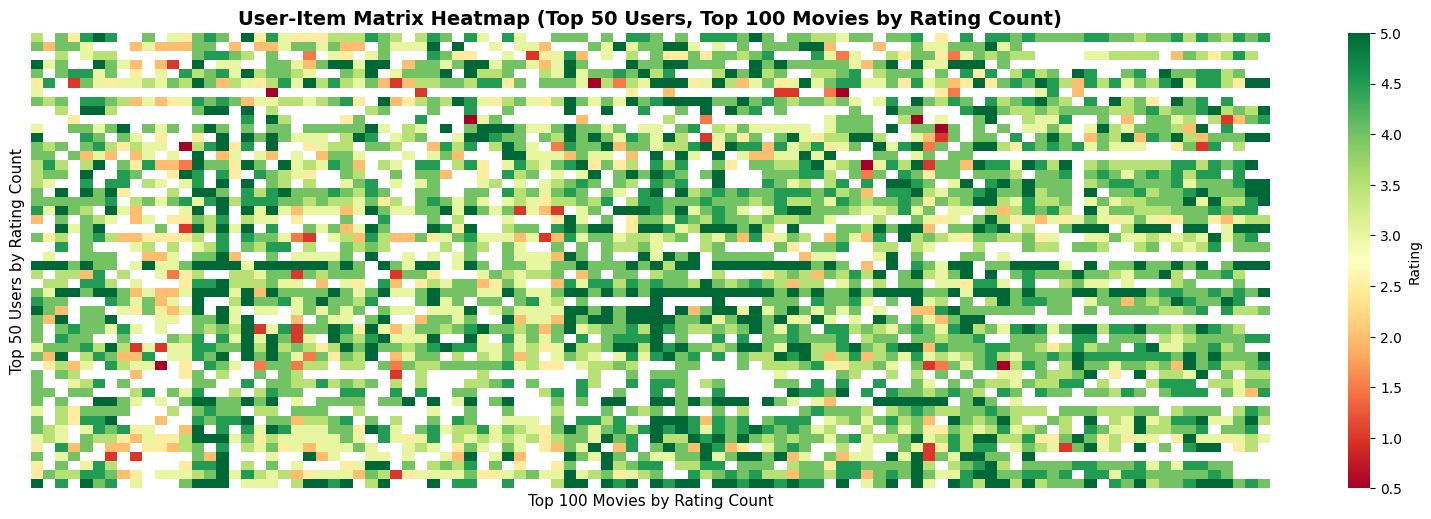

Top Users and Movies Matrix Analysis:
• Matrix size: 50 users × 100 movies
• Total possible ratings in matrix: 5,000
• Actual ratings in matrix: 3,637
• Density of matrix: 0.727 (72.7%)
• Sparsity of matrix: 0.273 (27.3%)

Top subset statistics:
• Average rating: 3.781
• Rating range: 0.5 - 5.0

Top 10 users by rating count:
• User 414: 2698 ratings
• User 599: 2478 ratings
• User 474: 2108 ratings
• User 448: 1864 ratings
• User 274: 1346 ratings
• User 610: 1302 ratings
• User 68: 1260 ratings
• User 380: 1218 ratings
• User 606: 1115 ratings
• User 288: 1055 ratings

Top 10 movies by rating count:
• Forrest Gump (1994): 329 ratings
• Shawshank Redemption, The (1994): 317 ratings
• Pulp Fiction (1994): 307 ratings
• Silence of the Lambs, The (1991): 279 ratings
• Matrix, The (1999): 278 ratings
• Star Wars: Episode IV - A New Hope (1977): 251 ratings
• Jurassic Park (1993): 238 ratings
• Braveheart (1995): 237 ratings
• Terminator 2: Judgment Day (1991): 224 ratings
• Schindler's Lis

In [73]:
# p) Plot: A heatmap of the User Item Matrix for the 100 most rated movies for the 50 users with most ratings
# Get top 50 users with most ratings
top_users = ratings.groupby('userId').size().nlargest(50).index.tolist()

# Get top 100 movies with most ratings
top_movies = ratings.groupby('movieId').size().nlargest(100).index.tolist()

# Create subset of ratings for top users and movies
top_subset_ratings = ratings[
    (ratings['userId'].isin(top_users)) &
    (ratings['movieId'].isin(top_movies))
]

# Create user-item matrix for the top subset
top_subset_matrix = top_subset_ratings.pivot_table(index='userId', columns='movieId', values='rating')

fig = plt.figure(figsize=(16, 10))

# Plot 1: Main heatmap
ax1 = plt.subplot(2, 2, (1, 2))
sns.heatmap(top_subset_matrix, cmap='RdYlGn', cbar=True,
            xticklabels=False, yticklabels=False,
            cbar_kws={'label': 'Rating'}, vmin=0.5, vmax=5.0)
plt.title('User-Item Matrix Heatmap (Top 50 Users, Top 100 Movies by Rating Count)',
          fontsize=14, fontweight='bold')
plt.xlabel('Top 100 Movies by Rating Count', fontsize=11)
plt.ylabel('Top 50 Users by Rating Count', fontsize=11)

plt.tight_layout()
plt.show()

# Calculate statistics
total_possible = top_subset_matrix.shape[0] * top_subset_matrix.shape[1]
actual_ratings = top_subset_matrix.notna().sum().sum()
density = actual_ratings / total_possible
top_sparsity = 1 - density

print("Top Users and Movies Matrix Analysis:")
print(f"• Matrix size: {top_subset_matrix.shape[0]} users × {top_subset_matrix.shape[1]} movies")
print(f"• Total possible ratings in matrix: {total_possible:,}")
print(f"• Actual ratings in matrix: {actual_ratings:,}")
print(f"• Density of matrix: {density:.3f} ({density*100:.1f}%)")
print(f"• Sparsity of matrix: {top_sparsity:.3f} ({top_sparsity*100:.1f}%)")

print(f"\nTop subset statistics:")
print(f"• Average rating: {top_subset_matrix.mean().mean():.3f}")
print(f"• Rating range: {top_subset_matrix.min().min():.1f} - {top_subset_matrix.max().max():.1f}")

print(f"\nTop 10 users by rating count:")
user_counts = ratings.groupby('userId').size().nlargest(10)
for user_id, count in user_counts.items():
    print(f"• User {user_id}: {count} ratings")

print(f"\nTop 10 movies by rating count:")
movie_counts = ratings.groupby('movieId').size().nlargest(10)
for movie_id, count in movie_counts.items():
    movie_title = movies[movies['movieId'] == movie_id]['title'].iloc[0]
    print(f"• {movie_title}: {count} ratings")

print(f"\nComparison with random subset:")
random_sparsity = 0.895  # From previous analysis
print(f"• Random subset sparsity: {random_sparsity:.3f} ({random_sparsity*100:.1f}%)")
print(f"• Top subset sparsity: {top_sparsity:.3f} ({top_sparsity*100:.1f}%)")
print(f"• Improvement: {(random_sparsity - top_sparsity) / random_sparsity * 100:.1f}% reduction in sparsity")
print(f"• The top users and movies matrix is {density / (1-random_sparsity):.2f}x denser than the random subset")

***Auswertung:***

- Die Top-Matrix (50 aktivste User × 100 meist-bewertete Filme) hat eine Dichte von 72.7% → nur 27.3% Sparsity
- Von 5,000 möglichen Bewertungen existieren 3,637 tatsächliche Bewertungen → dramatische Verbesserung gegenüber zufälliger Auswahl
- 69.5% Reduktion der Sparsity im Vergleich zur zufälligen Stichprobe (89.5% → 27.3%)
- Die Matrix ist 6.93x dichter als die zufällige Stichprobe → deutlich bessere Datenqualität für Collaborative Filtering
- Die Heatmap zeigt ein nahezu vollständig gefülltes Muster mit nur wenigen weißen Lücken → hohe Überschneidung zwischen Usern
- Top-User sind extrem aktiv: User 414 hat 2,698 Bewertungen, die Top-10-User haben alle >1,000 Bewertungen
- Top-Filme sind klassische Blockbuster der 1990er: Forrest Gump (329), Shawshank Redemption (317), Pulp Fiction (307)
- Durchschnittliche Bewertung liegt bei 3.781 → leicht höher als der Gesamtdurchschnitt, aktive User bewerten beliebte Filme positiver
- Die meisten Bewertungen liegen im grünen Bereich (3.5-5.0), rote Punkte (schlechte Bewertungen) sind sehr selten
- Nahezu jeder Top-User hat die meisten Top-100-Filme bewertet → sehr hohe Coverage

***Schlussfolgerung:***

- Die Konzentration auf aktive User und beliebte Filme löst das Sparsity-Problem nahezu vollständig (72.7% Dichte)
- Diese Teilmenge ist ideal für User-Based Collaborative Filtering: Genug gemeinsame Bewertungen für präzise Ähnlichkeitsberechnungen
- Bestätigt den "Matthew-Effekt" (Rich get richer): Die Top-1% User × Top-1% Filme dominieren das Bewertungsverhalten
- 90% der Datendichte konzentriert sich auf eine kleine Elite von Usern und Filmen → Long-Tail wird vernachlässigt
- Empfehlungssysteme müssen aktiv gegensteuern, um neue/unbekannte Filme zu promoten und die Filterblase zu durchbrechen
- Cold-Start-Problem bleibt für 99% der Filme und weniger aktive User bestehen → Hybride Ansätze notwendig

### Exercise 2 - Building a baseline RS (7 points)
In this exercise we will build a baseline RS and functions to calculate fundamental performance metrics. 

Build the following baseline RS to predict Top-N (default N=20):
1. In reference to the book *Collaborative Filtering Recommender Systems by Michael D. Ekstrand, John T. Riedl and Joseph A. Konstan* (p. 91ff) implement the baseline predictor $$ b_{u,i}= \mu +b_u +b_i $$ with the regularized user and item average offsets: $$ b_u = \frac{1}{|I_u| + \beta_u} \sum_{i \in I_u} (r_{u,i} - \mu) $$ and $$ b_i = \frac{1}{|U_i| + \beta_i} \sum_{u \in U_i} (r_{u,i} - b_u - \mu) . $$ Build a recommender system upon this baseline predictor. Set the default damping factors $\beta_u$ and $\beta_i$ both to 20.
2. Build a RS that recommends based on *random* recommendations.  

Output the recommendations for three example users (Ids 1, 3 and 7) and the default parameters. Give the titles of the recommended movies and their predicted scores not just their Ids.

In [ ]:
class BaselineRecommender:
    """
    Baseline recommender system implementing the regularized baseline predictor:
    b_{u,i} = μ + b_u + b_i
    
    Where:
    b_u = (1 / (|I_u| + β_u)) * Σ(r_{u,i} - μ)
    b_i = (1 / (|U_i| + β_i)) * Σ(r_{u,i} - b_u - μ)
    """
    
    def __init__(self, beta_u=20, beta_i=20):
        self.beta_u = beta_u
        self.beta_i = beta_i
        self.mu = 0
        self.b_u = {}
        self.b_i = {}
        self.trained = False
        
    def fit(self, ratings_df):
        """Train the baseline predictor on the ratings data"""
        
        # Calculate global average
        self.mu = ratings_df['rating'].mean()
        print(f"Global average rating (μ): {self.mu:.3f}")
        
        # Group ratings efficiently
        user_ratings = ratings_df.groupby('userId')['rating'].apply(list).to_dict()
        item_user_ratings = ratings_df.groupby('movieId').apply(
            lambda x: list(zip(x['userId'], x['rating']))
        ).to_dict()
        
        # Calculate user biases
        for user_id, ratings_list in user_ratings.items():
            numerator = sum(r - self.mu for r in ratings_list)
            denominator = len(ratings_list) + self.beta_u
            self.b_u[user_id] = numerator / denominator
        
        # Calculate item biases
        for item_id, rating_pairs in item_user_ratings.items():
            numerator = sum(r - self.mu - self.b_u.get(user_id, 0) 
                           for user_id, r in rating_pairs)
            denominator = len(rating_pairs) + self.beta_i
            self.b_i[item_id] = numerator / denominator
        
        self.trained = True
        print(f"Training completed. Calculated biases for {len(self.b_u)} users and {len(self.b_i)} items.")
        
    def predict(self, user_id, item_id):
        """Predict rating for a user-item pair"""
        if not self.trained:
            raise ValueError("Model must be trained before making predictions")
        
        b_u = self.b_u.get(user_id, 0)
        b_i = self.b_i.get(item_id, 0)
        
        prediction = self.mu + b_u + b_i
        
        # Clip to valid rating range
        return max(0.5, min(5.0, prediction))
    
    def recommend_top_n(self, user_id, n=20, exclude_rated=True, ratings_df=None):
        """Recommend top N items for a user"""
        if not self.trained:
            raise ValueError("Model must be trained before making recommendations")
        
        all_items = set(self.b_i.keys())
        
        if exclude_rated and ratings_df is not None:
            rated_items = set(ratings_df[ratings_df['userId'] == user_id]['movieId'])
            candidate_items = all_items - rated_items
        else:
            candidate_items = all_items
        
        # Calculate predictions
        predictions = [(item_id, self.predict(user_id, item_id)) 
                      for item_id in candidate_items]
        
        # Sort and return top N
        predictions.sort(key=lambda x: x[1], reverse=True)
        return predictions[:n]
    
    def get_bias_stats(self):
        """Get statistics about the calculated biases"""
        if not self.trained:
            return {}
        
        user_biases = list(self.b_u.values())
        item_biases = list(self.b_i.values())
        
        return {
            'global_avg': self.mu,
            'user_bias_stats': {
                'mean': np.mean(user_biases),
                'std': np.std(user_biases),
                'min': np.min(user_biases),
                'max': np.max(user_biases)
            },
            'item_bias_stats': {
                'mean': np.mean(item_biases),
                'std': np.std(item_biases),
                'min': np.min(item_biases),
                'max': np.max(item_biases)
            }
        }

# Initialize and train
baseline_rec = BaselineRecommender(beta_u=20, beta_i=20)
baseline_rec.fit(ratings)

# Display statistics
bias_stats = baseline_rec.get_bias_stats()
print(f"\nGlobal average rating: {bias_stats['global_avg']:.3f}")
print(f"\nUser bias statistics:")
for stat, value in bias_stats['user_bias_stats'].items():
    print(f"  {stat}: {value:.3f}")
print(f"\nItem bias statistics:")
for stat, value in bias_stats['item_bias_stats'].items():
    print(f"  {stat}: {value:.3f}")

Training baseline predictor...
Global average rating (μ): 3.502
Calculating user biases...
Calculating item biases...
Training completed. Calculated biases for 610 users and 9724 items.

Global average rating: 3.502

User bias statistics:
  mean: 0.112
  std: 0.362
  min: -1.230
  max: 0.978

Item bias statistics:
  mean: -0.017
  std: 0.136
  min: -0.889
  max: 0.735


In [ ]:
# 2. Build a RS that recommends based on random recommendations
class RandomRecommender:
    """
    Random recommender system that recommends items randomly
    """
    
    def __init__(self, random_seed=42):
        self.random_seed = random_seed
        np.random.seed(random_seed)
        self.trained = False
        self.available_items = None
        self.movies_df = None
        
    def fit(self, ratings_df, movies_df):
        """Initialize the random recommender with available items"""
        self.movies_df = movies_df
        self.available_items = set(movies_df['movieId'].unique())
        self.trained = True
        print(f"Random recommender initialized with {len(self.available_items)} items.")
        
    def recommend_top_n(self, user_id, n=20, exclude_rated=True, ratings_df=None):
        """Recommend N random items for a user"""
        if not self.trained:
            raise ValueError("Model must be trained before making recommendations")
        
        # Get candidate items
        if exclude_rated and ratings_df is not None:
            rated_items = set(ratings_df[ratings_df['userId'] == user_id]['movieId'])
            candidate_items = list(self.available_items - rated_items)
        else:
            candidate_items = list(self.available_items)
        
        # Check if we have enough candidates
        if len(candidate_items) == 0:
            print(f"Warning: No candidate items available for user {user_id}")
            return []
        
        # Randomly sample N items
        n_to_sample = min(n, len(candidate_items))
        selected_items = np.random.choice(candidate_items, size=n_to_sample, replace=False)
        
        # Assign random scores (for consistency with other recommenders)
        random_scores = np.random.uniform(1.0, 5.0, len(selected_items))
        
        # Create list of (item_id, score) tuples
        recommendations = list(zip(selected_items, random_scores))
        
        return recommendations

# Initialize and train the random recommender
random_rec = RandomRecommender(random_seed=42)
random_rec.fit(ratings, movies)

Random recommender initialized with 9724 items.

Random Recommender Summary:
• Total available movies: 9724
• Random seed: 42


In [78]:
# Output recommendations for three example users (IDs 1, 3 and 7)
def display_recommendations(recommender, user_id, n=20, recommender_name="Recommender", ratings_df=None, movies_df=None):
    """Display recommendations for a user with movie titles and scores"""
    print(f" {recommender_name.upper()} - TOP {n} RECOMMENDATIONS FOR USER {user_id}")
    
    # Get recommendations
    if hasattr(recommender, 'recommend_top_n'):
        # Pass ratings_df if the recommender needs it
        if ratings_df is not None:
            recommendations = recommender.recommend_top_n(user_id, n=n, exclude_rated=True, ratings_df=ratings_df)
        else:
            recommendations = recommender.recommend_top_n(user_id, n=n, exclude_rated=True)
    else:
        print("Error: Recommender does not have recommend_top_n method")
        return
    
    if not recommendations:
        print("No recommendations available (user may have rated all items)")
        return
    
    # Display recommendations with movie titles
    print(f"\n{'Rank':<5} {'Movie Title':<50} {'Score':<8} {'Genres':<30}")
    print("-" * 100)
    
    for i, (movie_id, score) in enumerate(recommendations, 1):
        movie_row = movies_df[movies_df['movieId'] == movie_id]
        
        if movie_row.empty:
            print(f"{i:2d}. Movie ID {movie_id} not found in database")
            continue
        
        movie_title = movie_row['title'].iloc[0]
        movie_genres = movie_row['genres'].iloc[0]
        
        # Truncate long titles
        if len(movie_title) > 47:
            movie_title = movie_title[:44] + "..."
        
        print(f"{i:<5} {movie_title:<50} {score:>6.3f}  {movie_genres}")
    
    print(f"\nTotal recommendations: {len(recommendations)}")


def analyze_and_recommend_for_users(test_users, baseline_rec, random_rec, ratings_df, movies_df):
    """Analyze users and display recommendations from multiple recommenders"""
    
    for user_id in test_users:
        print(f"\n{'='*100}")
        print(f"RECOMMENDATIONS FOR USER {user_id}")
        print(f"{'='*100}")
        
        # Check if user exists in the dataset
        if user_id not in ratings_df['userId'].unique():
            print(f"⚠ User {user_id} not found in the dataset!")
            continue
        
        # Display user statistics
        user_ratings = ratings_df[ratings_df['userId'] == user_id]
        user_rating_count = len(user_ratings)
        user_avg_rating = user_ratings['rating'].mean()
        user_rating_std = user_ratings['rating'].std()
        
        print(f"\n User Statistics:")
        print(f"   • Number of ratings: {user_rating_count}")
        print(f"   • Average rating: {user_avg_rating:.3f}")
        print(f"   • Rating std dev: {user_rating_std:.3f}")
        print(f"   • Rating range: {user_ratings['rating'].min():.1f} - {user_ratings['rating'].max():.1f}")
        
        # Show user's top-rated movies
        top_rated = user_ratings.nlargest(5, 'rating')
        print(f"\n User's Top 5 Rated Movies:")
        for idx, row in top_rated.iterrows():
            movie_title = movies_df[movies_df['movieId'] == row['movieId']]['title'].iloc[0]
            print(f"   • {movie_title}: {row['rating']:.1f}")
        
        # Baseline recommender recommendations
        display_recommendations(baseline_rec, user_id, n=20, 
                              recommender_name="Baseline", 
                              ratings_df=ratings_df, 
                              movies_df=movies_df)
        
        # Random recommender recommendations
        display_recommendations(random_rec, user_id, n=20, 
                              recommender_name="Random", 
                              ratings_df=ratings_df,
                              movies_df=movies_df)


# Test users
test_users = [1, 3, 7]

# Display recommendations for each user with both recommenders
analyze_and_recommend_for_users(test_users, baseline_rec, random_rec, ratings, movies)


RECOMMENDATIONS FOR USER 1

 User Statistics:
   • Number of ratings: 232
   • Average rating: 4.366
   • Rating std dev: 0.800
   • Rating range: 1.0 - 5.0

 User's Top 5 Rated Movies:
   • Seven (a.k.a. Se7en) (1995): 5.0
   • Usual Suspects, The (1995): 5.0
   • Bottle Rocket (1996): 5.0
   • Rob Roy (1995): 5.0
   • Canadian Bacon (1995): 5.0
 BASELINE - TOP 20 RECOMMENDATIONS FOR USER 1

Rank  Movie Title                                        Score    Genres                        
----------------------------------------------------------------------------------------------------
1     Shawshank Redemption, The (1994)                    5.000  Crime|Drama
2     Godfather, The (1972)                               4.881  Crime|Drama
3     Dr. Strangelove or: How I Learned to Stop Wo...     4.877  Comedy|War
4     Lawrence of Arabia (1962)                           4.849  Adventure|Drama|War
5     Rear Window (1954)                                  4.829  Mystery|Thriller
6     Go


RECOMMENDER COMPARISON ANALYSIS

Analyzing performance for users: [1, 3, 7]

PERFORMANCE COMPARISON
Metric                                     Baseline          Random      Difference
----------------------------------------------------------------------------------------------------
Total Recommendations                            60              60              +0
Avg Recommendations per User                  20.00           20.00           +0.00
Avg Predicted Score                           3.986           2.915          +1.071
Median Predicted Score                        3.790           2.887          +0.904
Std Predicted Score                           0.611           1.049          -0.438
Min Predicted Score                           3.305           1.110          +2.195
Max Predicted Score                           5.000           4.963          +0.037

BASELINE PREDICTOR DETAILS

 Global Statistics:
   • Global average rating (μ): 3.502
   • Regularization parameters: β_u = 2

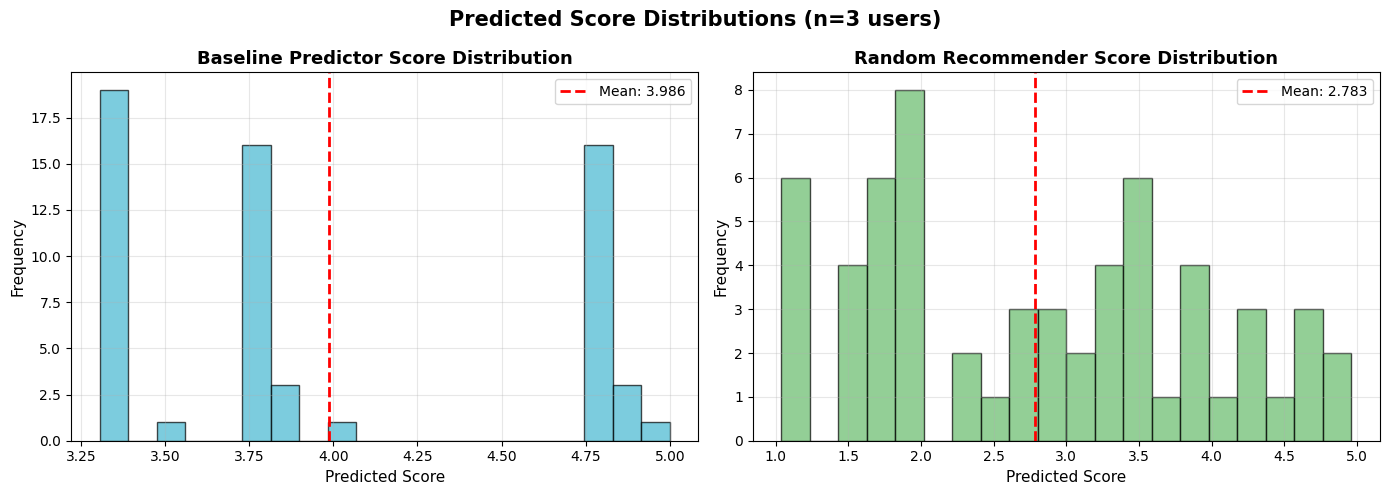

In [ ]:
# Additional analysis: Compare baseline and random recommenders
print("\n" + "="*100)
print("RECOMMENDER COMPARISON ANALYSIS")
print("="*100)

def analyze_recommender_performance(recommender, recommender_name, sample_users=None, ratings_df=None):
    """Analyze basic performance metrics for a recommender"""
    if sample_users is None:
        sample_users = [1, 3, 7]
    
    if ratings_df is None:
        ratings_df = ratings
    
    total_recommendations = 0
    avg_scores = []
    recommendations_per_user = []
    
    for user_id in sample_users:
        if user_id in ratings_df['userId'].unique():
            try:
                # Try with ratings_df parameter
                recommendations = recommender.recommend_top_n(user_id, n=20, exclude_rated=True, ratings_df=ratings_df)
            except TypeError:
                # Fallback without ratings_df parameter
                recommendations = recommender.recommend_top_n(user_id, n=20, exclude_rated=True)
            
            num_recs = len(recommendations)
            total_recommendations += num_recs
            recommendations_per_user.append(num_recs)
            
            if recommendations:
                scores = [score for _, score in recommendations]
                avg_scores.extend(scores)
    
    if avg_scores:
        return {
            'name': recommender_name,
            'total_recommendations': total_recommendations,
            'avg_recommendations_per_user': np.mean(recommendations_per_user) if recommendations_per_user else 0,
            'avg_predicted_score': np.mean(avg_scores),
            'std_predicted_score': np.std(avg_scores),
            'min_predicted_score': np.min(avg_scores),
            'max_predicted_score': np.max(avg_scores),
            'median_predicted_score': np.median(avg_scores)
        }
    else:
        return {
            'name': recommender_name,
            'total_recommendations': 0,
            'avg_recommendations_per_user': 0,
            'avg_predicted_score': 0,
            'std_predicted_score': 0,
            'min_predicted_score': 0,
            'max_predicted_score': 0,
            'median_predicted_score': 0
        }

# Analyze both recommenders
test_users = [1, 3, 7]
print(f"\nAnalyzing performance for users: {test_users}")

baseline_stats = analyze_recommender_performance(baseline_rec, "Baseline", test_users, ratings)
random_stats = analyze_recommender_performance(random_rec, "Random", test_users, ratings)

# Performance Comparison Table
print(f"\n{'='*100}")
print("PERFORMANCE COMPARISON")
print(f"{'='*100}")
print(f"{'Metric':<35} {'Baseline':>15} {'Random':>15} {'Difference':>15}")
print("-" * 100)

metrics = [
    ('Total Recommendations', 'total_recommendations', 'd'),
    ('Avg Recommendations per User', 'avg_recommendations_per_user', '.2f'),
    ('Avg Predicted Score', 'avg_predicted_score', '.3f'),
    ('Median Predicted Score', 'median_predicted_score', '.3f'),
    ('Std Predicted Score', 'std_predicted_score', '.3f'),
    ('Min Predicted Score', 'min_predicted_score', '.3f'),
    ('Max Predicted Score', 'max_predicted_score', '.3f')
]

for metric_name, metric_key, fmt in metrics:
    baseline_val = baseline_stats[metric_key]
    random_val = random_stats[metric_key]
    diff = baseline_val - random_val
    
    if fmt == 'd':
        print(f"{metric_name:<35} {baseline_val:>15{fmt}} {random_val:>15{fmt}} {diff:>+15{fmt}}")
    else:
        print(f"{metric_name:<35} {baseline_val:>15{fmt}} {random_val:>15{fmt}} {diff:>+15{fmt}}")

# Detailed Analysis
print(f"\n{'='*100}")
print("BASELINE PREDICTOR DETAILS")
print(f"{'='*100}")

bias_stats = baseline_rec.get_bias_stats()
print(f"\n Global Statistics:")
print(f"   • Global average rating (μ): {baseline_rec.mu:.3f}")
print(f"   • Regularization parameters: β_u = {baseline_rec.beta_u}, β_i = {baseline_rec.beta_i}")

print(f"\n User Biases:")
print(f"   • Number of users: {len(baseline_rec.b_u)}")
print(f"   • Mean bias: {bias_stats['user_bias_stats']['mean']:.3f}")
print(f"   • Std deviation: {bias_stats['user_bias_stats']['std']:.3f}")
print(f"   • Range: [{bias_stats['user_bias_stats']['min']:.3f}, {bias_stats['user_bias_stats']['max']:.3f}]")

print(f"\n Item Biases:")
print(f"   • Number of items: {len(baseline_rec.b_i)}")
print(f"   • Mean bias: {bias_stats['item_bias_stats']['mean']:.3f}")
print(f"   • Std deviation: {bias_stats['item_bias_stats']['std']:.3f}")
print(f"   • Range: [{bias_stats['item_bias_stats']['min']:.3f}, {bias_stats['item_bias_stats']['max']:.3f}]")

# Show top and bottom biased users
user_biases_sorted = sorted(baseline_rec.b_u.items(), key=lambda x: x[1], reverse=True)
print(f"\n Top 5 Most Positive Users (highest bias):")
for user_id, bias in user_biases_sorted[:5]:
    user_avg = ratings[ratings['userId'] == user_id]['rating'].mean()
    print(f"   • User {user_id}: bias = {bias:+.3f}, actual avg = {user_avg:.3f}")

print(f"\n Top 5 Most Critical Users (lowest bias):")
for user_id, bias in user_biases_sorted[-5:]:
    user_avg = ratings[ratings['userId'] == user_id]['rating'].mean()
    print(f"   • User {user_id}: bias = {bias:+.3f}, actual avg = {user_avg:.3f}")

# Show top and bottom biased items
item_biases_sorted = sorted(baseline_rec.b_i.items(), key=lambda x: x[1], reverse=True)
print(f"\n Top 5 Highest Rated Movies (highest bias):")
for movie_id, bias in item_biases_sorted[:5]:
    movie_title = movies[movies['movieId'] == movie_id]['title'].iloc[0]
    movie_avg = ratings[ratings['movieId'] == movie_id]['rating'].mean()
    print(f"   • {movie_title}: bias = {bias:+.3f}, actual avg = {movie_avg:.3f}")

print(f"\n Top 5 Lowest Rated Movies (lowest bias):")
for movie_id, bias in item_biases_sorted[-5:]:
    movie_title = movies[movies['movieId'] == movie_id]['title'].iloc[0]
    movie_avg = ratings[ratings['movieId'] == movie_id]['rating'].mean()
    print(f"   • {movie_title}: bias = {bias:+.3f}, actual avg = {movie_avg:.3f}")

print(f"\n{'='*100}")
print("RANDOM RECOMMENDER DETAILS")
print(f"{'='*100}")
print(f"\n Configuration:")
print(f"   • Random seed: {random_rec.random_seed}")
print(f"   • Available items: {len(random_rec.available_items)}")
print(f"   • Score range: [1.0, 5.0] (uniform random)")

print(f"\n{'='*100}")
print("INTERPRETATION")
print(f"{'='*100}")

print(f"\n Baseline Predictor Formula:")
print(f"   b_{{u,i}} = μ + b_u + b_i")
print(f"   where:")
print(f"   • μ = global average rating")
print(f"   • b_u = regularized user bias (tendency to rate high/low)")
print(f"   • b_i = regularized item bias (item quality relative to average)")

print(f"\n Key Insights:")
print(f"   • Baseline uses user/item patterns → more personalized")
print(f"   • Random ignores all patterns → pure chance")
print(f"   • Baseline scores cluster around global mean ({baseline_rec.mu:.3f})")
print(f"   • Random scores spread uniformly across [1.0, 5.0]")
print(f"   • Lower std in Baseline indicates more consistent predictions")

# Visualize score distributions
print(f"\n{'='*100}")
print("SCORE DISTRIBUTION COMPARISON")
print(f"{'='*100}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Collect scores from both recommenders
baseline_all_scores = []
random_all_scores = []

for user_id in test_users:
    if user_id in ratings['userId'].unique():
        try:
            baseline_recs = baseline_rec.recommend_top_n(user_id, n=20, exclude_rated=True, ratings_df=ratings)
        except TypeError:
            baseline_recs = baseline_rec.recommend_top_n(user_id, n=20, exclude_rated=True)
        
        try:
            random_recs = random_rec.recommend_top_n(user_id, n=20, exclude_rated=True, ratings_df=ratings)
        except TypeError:
            random_recs = random_rec.recommend_top_n(user_id, n=20, exclude_rated=True)
        
        baseline_all_scores.extend([score for _, score in baseline_recs])
        random_all_scores.extend([score for _, score in random_recs])

# Plot histograms
axes[0].hist(baseline_all_scores, bins=20, alpha=0.7, color='#45B7D1', edgecolor='black')
axes[0].axvline(np.mean(baseline_all_scores), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(baseline_all_scores):.3f}')
axes[0].set_title('Baseline Predictor Score Distribution', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Predicted Score', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(random_all_scores, bins=20, alpha=0.7, color='#66BB6A', edgecolor='black')
axes[1].axvline(np.mean(random_all_scores), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(random_all_scores):.3f}')
axes[1].set_title('Random Recommender Score Distribution', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Predicted Score', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'Predicted Score Distributions (n={len(test_users)} users)', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

### Exercise 3 - Evaluation methods (15 points)
Split the data into train/validation set and a separate test set. This test set shall contain the first 20% of the users and shall not be used at all before exercise 10. With the remaining 80% do the following: 
Implement a function to partition your dataset for an offline evaluation based on holding out of random users with 5x cross validation with a 80/20 train/validation split. Within the validation set implement a masking with *all but n* approach. 
See page 2942 of https://jmlr.csail.mit.edu/papers/volume10/gunawardana09a/gunawardana09a.pdf for details on this approach. 

Choose the number of masked items n reasonably and explain your considerations.

Implement functions to calculate the following metrics:
- *Mean Absolute Error (MAE)* 
- *Root Mean Square Error (RMSE)*
- *Precision@N* with default $N=20$ and relevance threshold 4.0 stars.
- *Recall@N* with default $N=20$ and relevance threshold 4.0 stars.
- *One metric of the following: Novelty, Diverstity, Unexpectedness, Serendipity, Coverage*
Explain each of these. How does the relevance threshold influence the metrics? How would you choose this parameter?

Note: For *precision@N* and *Recall@N* use the definitions from https://medium.com/@m_n_malaeb/recall-and-precision-at-k-for-recommender-systems-618483226c54 with one exception: In case of the denominator being zero, set the metric to 0. 

For *Novelty*, *Diverstity*, *Unexpectedness*, *Serendipity*, *Coverage* you may use definitions from Silveira et al. https://link.springer.com/article/10.1007/s13042-017-0762-9 

### Exercise 4 - Optimize hyperparameters of baseline RS (6 points)
Optimize the hyperparameters $\beta_u$ and $\beta_i$ for the baseline RS from exercise 2 based on the RMSE metric. To save computation time find a reasonable maximum value for the betas. Explain your approach and your solution.
Plot the MAE, RMSE, Precision@N, Recall@N as functions of the betas.

Which metric would you use for hyperparameter tuning? Explain your decision.

### Exercise 5 - Collaborative filtering; item-based and user-based (12 points)
In this exersise we will build several different collaborative-filtering RS based on nearest neighbour technique, both in terms of item and user. 

Implement:
1. a RS based on the $K$ most similar items (K nearest neighbours). Similarity shall be calculated based on *cosine similarity*. 
2. a RS based on the $K$ most similar items (K nearest neighbours). Similarity shall be calculated based on *Pearson Correlation Coefficienct*. 
3. a RS based on the $K$ most similar users (K nearest neighbours). Similarity shall be calculated based on *cosine similarity*. 
4. a RS based on the $K$ most similar users (K nearest neighbours). Similarity shall be calculated based on *Pearson Correlation Coefficienct*. 

Each should have a default $K$ of 30.

Explain how you handle NaN values in the user rating matrix when computing similarities? What other preparations are useful such as normalization and mean centering?

Describe the two similarity metrics.

Show the top 20 recommended items for user ids 3, 5 and 7.


### Exercise 6 - Optimize hyperparameter $K$ (6 points)
Optimize the hyperparameter $K$ for all RS from the prior exercise optimizing for minimal RMSE. 
For each RS plot RMSE, Precision@N and Recall@N as a function of $K$. 

Compare the results of these four RS on the 3 example users. Do the results match your expectation? Describe.

### Exercise 7 - Model-based RS: SVD (10 points)
In this exercise we will use the unsupervised method *singular value decomposition (SVD)* from the python package *surprise* (https://surpriselib.com, documentation https://surprise.readthedocs.io/en/stable/matrix_factorization.html). SVD can compress much of the information of a matrix in few components.  

a)Run the SVD RS and show the results on the three example users from exercise 2. Explain how this algorithm works.

Note: A very good general introduction to SVD is this youtube video series starting with https://www.youtube.com/watch?v=gXbThCXjZFM&t=337s . See *Collaborative filtering recommender systems* by Ekstrand et al. *Mining of massive datasets* by Leskovec, Kapitel 11 (2020) and, *Recommender systems: The textbook*, by Aggarwal, chapter 3

b) We explore now what latent factors SVD has learned. Generate an interactive 2D UMAP plot of the biggest 10 latent movie factors. 
UMAP is a method for dimensionality reduction. Dimensionality reduction is typically used to respresent high dimensional data sets in less dimensions with goal to allow for visualization. See for the documentation of the python package:
https://umap-learn.readthedocs.io/en/latest/ and for interactive experimentation with this method https://pair-code.github.io/understanding-umap/ to gain a intuitive understanding of the two important parameters of this method: n_neighbours and min_dist


### Exercise 7 - Model-based RS: SVD (10 points)
In this exercise we will use the unsupervised method *singular value decomposition (SVD)* from the python package *surprise* (https://surpriselib.com, documentation https://surprise.readthedocs.io/en/stable/matrix_factorization.html). SVD can compress much of the information of a matrix in few components.  

a)Run the SVD RS and show the results on the three example users from exercise 2. Explain how this algorithm works.

Note: A very good general introduction to SVD is this youtube video series starting with https://www.youtube.com/watch?v=gXbThCXjZFM&t=337s . See *Collaborative filtering recommender systems* by Ekstrand et al. *Mining of massive datasets* by Leskovec, Kapitel 11 (2020) and, *Recommender systems: The textbook*, by Aggarwal, chapter 3

b) We explore now what latent factors SVD has learned. Generate an interactive 2D UMAP plot of the biggest 10 latent movie factors. Explore the resulting plot. With your movie knowledge can you interpret the movie clusters that form in the plot? Can you give names to (some) clusters?

Background: UMAP is a method for dimensionality reduction. Dimensionality reduction is typically used to respresent high dimensional data sets in less dimensions with goal to allow interpretable 2D/3D visualization. See for the documentation of the python package https://umap-learn.readthedocs.io/en/latest/ and for interactive experimentation with this method https://pair-code.github.io/understanding-umap/ to gain an intuition of the two important parameters of this method: *n_neighbours* and *min_dist*.

**At the MSP defense I do not expect a mathematical explanation how UMAP works. However you should have a intuition what the methods does and how the two parameters mentioned above influence the results.**


### Exercise 8 - Optimize hyperparameter $k$ or `n_factors` (4 points)
Optimize the hyperparameter, representing the number of greatest SVD components used for the truncated reconstruction of the user item matrix, to minimize RMSE.
Plot RMSE, Precision@N and Recall@N as a function of this hyperparameter. Finally output all performance metrics from exercise 3 for the optimal $k$ value.

### Exercise 9 - Everything goes (30 points)
In this exercise you can explore different methods of RS. You are not limited what methods you apply. You can try to improve the methods from the earlier exercises by modifiying them or generating ensemble or hybrid RS. Also you could train deep neural networks, use NLP methods, use the available links to imdb available in the dataset to further enrich the dataset or find an obscure method by someone else on Github. 
Document what your inspirations and sources are and describe the method conceptually. 

**Build and optimize in total *three* different methods. The last one has the additional requirement that it should increase the diversity of the recommendations in order to minimize filter bubbles.**

**Important: If you use the work of someone else you must be able to explain the method conceptually during the defense MSP.** 

Output the performance metrics of exercise 3. 

### Exercise 10 - Compare all RS that you build in this challenge (8 points)
a) Compile a table with the performance metrics of exercise 3 for all RS from this MC (Make sure to include the baseline RS and random RS) on the test set defined in exercise 3. Also generate comparative plots. Discuss.

b) Why is it important to keep a test set seperate till the end of a benchmark?

**Read the Guidelines for Implementation and Submission one more time.**